## Time Series Modeling

In [2]:
# import the necessary packages and the dataframe
import statsmodels.api as sm
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')

from funcs import load_stocks_dataframe
df = load_stocks_dataframe()
df = df.dropna()

In [3]:
# take a look at the data
df.head()

,Date,GrowthStock_AdjClose,GrowthStock_PercentChange,ValueStock_AdjClose,ValueStock_PercentChange,Treasury10yr_AdjClose,Treasury10yr_PercentChange,Treasury10yr_Diff,exchange,exchange_PercentChange,exchange_Diff,inflation5yr,inflation5yr_PercentChange,inflation5yr_Diff,CPI,CPI_PercentChange,CPI_Diff
712,2003-04-01,8.603225,0.010614,26.337534,0.016642,3.827,0.001046,0.004,1.4729,0.002314,0.0034,1.64,-0.006061,-0.01,2.17513,-0.034786,-0.07839
713,2003-04-02,8.835845,0.027039,27.103275,0.029074,3.932,0.027437,0.105,1.4762,0.002240,0.0033,1.66,0.012195,0.02,2.17513,-0.034786,-0.07839
714,2003-04-03,8.831999,-0.000435,26.878065,-0.008309,3.916,-0.004069,-0.016,1.4760,-0.000135,-0.0002,1.64,-0.012048,-0.02,2.17513,-0.034786,-0.07839
715,2003-04-04,8.824308,-0.000871,27.038921,0.005985,3.944,0.007150,0.028,1.4720,-0.002710,-0.0040,1.63,-0.006098,-0.01,2.17513,-0.034786,-0.07839
716,2003-04-07,8.828156,0.000436,27.109701,0.002618,4.014,0.017748,0.070,1.4843,0.008356,0.0123,1.61,-0.012270,-0.02,2.17513,-0.034786,-0.07839


In [5]:
# set the index to be date for Time Series Modeling (TSM) later
df.index = pd.DatetimeIndex(df["Date"])
df

,Date,GrowthStock_AdjClose,GrowthStock_PercentChange,ValueStock_AdjClose,ValueStock_PercentChange,Treasury10yr_AdjClose,Treasury10yr_PercentChange,Treasury10yr_Diff,exchange,exchange_PercentChange,exchange_Diff,inflation5yr,inflation5yr_PercentChange,inflation5yr_Diff,CPI,CPI_PercentChange,CPI_Diff
Date,,,,,,,,,,,,,,,,,
2003-04-01,2003-04-01,8.603225,0.010614,26.337534,0.016642,3.827,0.001046,0.004,1.4729,0.002314,0.0034,1.64,-0.006061,-0.01,2.17513,-0.034786,-0.07839
2003-04-02,2003-04-02,8.835845,0.027039,27.103275,0.029074,3.932,0.027437,0.105,1.4762,0.002240,0.0033,1.66,0.012195,0.02,2.17513,-0.034786,-0.07839
2003-04-03,2003-04-03,8.831999,-0.000435,26.878065,-0.008309,3.916,-0.004069,-0.016,1.4760,-0.000135,-0.0002,1.64,-0.012048,-0.02,2.17513,-0.034786,-0.07839
2003-04-04,2003-04-04,8.824308,-0.000871,27.038921,0.005985,3.944,0.007150,0.028,1.4720,-0.002710,-0.0040,1.63,-0.006098,-0.01,2.17513,-0.034786,-0.07839
2003-04-07,2003-04-07,8.828156,0.000436,27.109701,0.002618,4.014,0.017748,0.070,1.4843,0.008356,0.0123,1.61,-0.012270,-0.02,2.17513,-0.034786,-0.07839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-07,2022-01-07,79.930000,-0.009664,158.410004,0.002658,1.771,0.021927,0.038,1.2643,-0.006444,-0.0082,2.78,0.003610,0.01,7.09654,0.039273,0.26817
2022-01-10,2022-01-10,79.989998,0.000751,157.820007,-0.003724,1.780,0.005082,0.009,1.2679,0.002847,0.0036,2.77,-0.003597,-0.01,7.09654,0.039273,0.26817
2022-01-11,2022-01-11,80.860001,0.010876,158.929993,0.007033,1.746,-0.019101,-0.034,1.2598,-0.006389,-0.0081,2.87,0.036101,0.10,7.09654,0.039273,0.26817


In [7]:
# since trading days are business days, so we need to change the frequency to 'B'
df = df.asfreq('B')
# check the indices
df.index

DatetimeIndex(['2003-04-01', '2003-04-02', '2003-04-03', '2003-04-04',
               '2003-04-07', '2003-04-08', '2003-04-09', '2003-04-10',
               '2003-04-11', '2003-04-14',
               ...
               '2021-12-31', '2022-01-03', '2022-01-04', '2022-01-05',
               '2022-01-06', '2022-01-07', '2022-01-10', '2022-01-11',
               '2022-01-12', '2022-01-13'],
              dtype='datetime64[ns]', name='Date', length=4903, freq='B')

In [8]:
# fill the NAN value with the previous value
df = df.fillna(method="ffill")

In [9]:
# check it is indeed the case where there is no NaN 
df.isna().sum()

Date                          0
GrowthStock_AdjClose          0
GrowthStock_PercentChange     0
ValueStock_AdjClose           0
ValueStock_PercentChange      0
Treasury10yr_AdjClose         0
Treasury10yr_PercentChange    0
Treasury10yr_Diff             0
exchange                      0
exchange_PercentChange        0
exchange_Diff                 0
inflation5yr                  0
inflation5yr_PercentChange    0
inflation5yr_Diff             0
CPI                           0
CPI_PercentChange             0
CPI_Diff                      0
dtype: int64

In [10]:
df

,Date,GrowthStock_AdjClose,GrowthStock_PercentChange,ValueStock_AdjClose,ValueStock_PercentChange,Treasury10yr_AdjClose,Treasury10yr_PercentChange,Treasury10yr_Diff,exchange,exchange_PercentChange,exchange_Diff,inflation5yr,inflation5yr_PercentChange,inflation5yr_Diff,CPI,CPI_PercentChange,CPI_Diff
Date,,,,,,,,,,,,,,,,,
2003-04-01,2003-04-01,8.603225,0.010614,26.337534,0.016642,3.827,0.001046,0.004,1.4729,0.002314,0.0034,1.64,-0.006061,-0.01,2.17513,-0.034786,-0.07839
2003-04-02,2003-04-02,8.835845,0.027039,27.103275,0.029074,3.932,0.027437,0.105,1.4762,0.002240,0.0033,1.66,0.012195,0.02,2.17513,-0.034786,-0.07839
2003-04-03,2003-04-03,8.831999,-0.000435,26.878065,-0.008309,3.916,-0.004069,-0.016,1.4760,-0.000135,-0.0002,1.64,-0.012048,-0.02,2.17513,-0.034786,-0.07839
2003-04-04,2003-04-04,8.824308,-0.000871,27.038921,0.005985,3.944,0.007150,0.028,1.4720,-0.002710,-0.0040,1.63,-0.006098,-0.01,2.17513,-0.034786,-0.07839
2003-04-07,2003-04-07,8.828156,0.000436,27.109701,0.002618,4.014,0.017748,0.070,1.4843,0.008356,0.0123,1.61,-0.012270,-0.02,2.17513,-0.034786,-0.07839
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-07,2022-01-07,79.930000,-0.009664,158.410004,0.002658,1.771,0.021927,0.038,1.2643,-0.006444,-0.0082,2.78,0.003610,0.01,7.09654,0.039273,0.26817
2022-01-10,2022-01-10,79.989998,0.000751,157.820007,-0.003724,1.780,0.005082,0.009,1.2679,0.002847,0.0036,2.77,-0.003597,-0.01,7.09654,0.039273,0.26817
2022-01-11,2022-01-11,80.860001,0.010876,158.929993,0.007033,1.746,-0.019101,-0.034,1.2598,-0.006389,-0.0081,2.87,0.036101,0.10,7.09654,0.039273,0.26817


In [32]:
# train, test split
recency = int(df.shape[0]*0.7)
growth_train = df.iloc[:recency]["GrowthStock_AdjClose"]
growth_test  = df.iloc[recency:]["GrowthStock_AdjClose"]
value_train  = df.iloc[:recency]["ValueStock_AdjClose"]
value_test   = df.iloc[recency:]["ValueStock_AdjClose"]
growth_train.shape, growth_test.shape, value_train.shape, value_test.shape

((3432,), (1471,), (3432,), (1471,))

### TMS for Growth Stocks

In [17]:
m = growth_train.mean()
time = growth_train.index

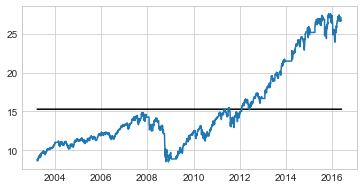

In [19]:
fig, ax = plt.subplots(1, figsize = (6, 3))
ax.plot(time, np.ones(len(time))*m, label = "reference", color = "black")
ax.plot(growth_train, label = "Growth Stock Price")

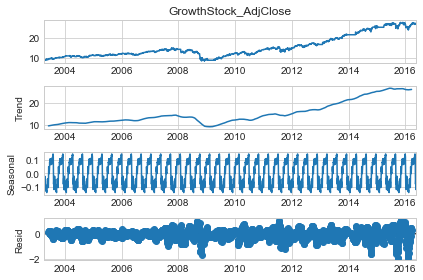

In [23]:
# decomposition
decomposition = sm.tsa.seasonal_decompose(growth_train, model='additive', period = 90)
fig = decomposition.plot()

#### SARIMAX model

In [54]:
# run the iterations to select the best model
order = (3, 3, 1)
seasonal_order = (0, 1, 1, 5)
model1 = sm.tsa.SARIMAX(growth_train, order = order, seasonal_order = seasonal_order)
fit1 = model1.fit()
print(fit1.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.59322D-01    |proj g|=  1.75714D+00


 This problem is unconstrained.



At iterate    5    f= -3.04200D-01    |proj g|=  4.08619D-02

At iterate   10    f= -3.61489D-01    |proj g|=  2.48178D-01

At iterate   15    f= -3.84270D-01    |proj g|=  4.71316D-01

At iterate   20    f= -3.88862D-01    |proj g|=  2.92381D-02

At iterate   25    f= -3.89430D-01    |proj g|=  1.01704D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     52      1     0     0   3.628D-03  -3.894D-01
  F = -0.38943214879306548     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                     SARIMAX Results                                     
Dep. Variable:              GrowthStock_AdjClose   No. Observations:                 3432
Model:             SARIMAX(3, 3, 1)x(0, 1, 1, 5)   Log Likelihood                1336.531
Date:                           Mon, 07 Mar 2022   AIC                          -2661.062
Time:                                   21:06:53   BIC         

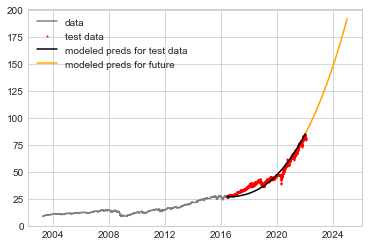

In [65]:
# prediction on test data and future data
test_preds = fit1.get_prediction(start = growth_test.index.values[0],
                                   end = growth_test.index.values[-1])

future_preds = fit1.get_prediction(start = growth_test.index.values[-1],
                                     end = pd.to_datetime('2025-01-01'))

test_preds   = test_preds.predicted_mean
future_preds = future_preds.predicted_mean

plt.plot(growth_train, color = 'grey', label = 'data')
plt.scatter(growth_test.index.values, growth_test, color = "red", label = "test data", s = 1)
plt.plot(test_preds, zorder = 5, label = "modeled preds for test data", color = 'black')
plt.plot(future_preds, zorder = 5, label = "modeled preds for future", color = 'orange')
plt.legend()

### Model Selection Part

In [51]:
def test_MSE(fit, y_test):
    
    test_preds = fit.get_prediction(start = y_test.index.values[0], 
                                    end  = y_test.index.values[-1])
    test_preds = test_preds.predicted_mean
    
    return ((growth_test - test_preds)**2).mean()

In [52]:
test_MSE(fit1, growth_test)

1545.3565705476894

In [53]:
from itertools import product
a = range(0, 5)

best_order = (0, 0, 0)
best_MSE   = np.inf
for order in product(a, a, a):
    model = sm.tsa.SARIMAX(growth_train, order = order, seasonal_order = seasonal_order)
    fit = model.fit(verbose = False)
    MSE = test_MSE(fit, growth_test)
    if MSE < best_MSE:
        print("Found MSE " + str(round(MSE, 2)) + " with order " + str(order))
        best_MSE = MSE
        best_order = order
        best_model = model  

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.60697D-01    |proj g|=  2.47333D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      7      1     0     0   3.918D-06   2.603D-01
  F =  0.26034753511202435     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


Found MSE 606.28 with order (0, 0, 0)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.20895D-01    |proj g|=  4.02832D-01


 This problem is unconstrained.



At iterate    5    f= -1.96342D-02    |proj g|=  2.27333D-01

At iterate   10    f= -3.49777D-02    |proj g|=  1.81443D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     15      1     0     0   3.582D-06  -3.498D-02
  F =  -3.4977746488747762E-002

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Found MSE 605.84 with order (0, 0, 1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.28398D-02    |proj g|=  5.98485D-01


 This problem is unconstrained.



At iterate    5    f= -1.97628D-01    |proj g|=  1.51911D-01

At iterate   10    f= -2.00495D-01    |proj g|=  4.48690D-03

At iterate   15    f= -2.00514D-01    |proj g|=  2.90569D-05



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     60      2     0     0   2.906D-05  -2.005D-01
  F = -0.20051397676402752     

ABNORMAL_TERMINATION_IN_LNSRCH                              
Found MSE 604.87 with order (0, 0, 2)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.57112D-02    |proj g|=  2.28774D+00


 This problem is unconstrained.



At iterate    5    f= -1.69257D-01    |proj g|=  1.91979D-01

At iterate   10    f= -2.08923D-01    |proj g|=  1.20104D-01

At iterate   15    f= -2.38699D-01    |proj g|=  1.68388D-01

At iterate   20    f= -2.39840D-01    |proj g|=  1.66233D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     49      1     0     0   7.074D-05  -2.398D-01
  F = -0.23984624196338705     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Found MSE 604.53 with order (0, 0, 3)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.15559D-01    |proj g|=  8.14060D-01


 This problem is unconstrained.



At iterate    5    f= -4.48256D-01    |proj g|=  2.22010D-01

At iterate   10    f= -4.51963D-01    |proj g|=  2.94877D-01

At iterate   15    f= -4.84951D-01    |proj g|=  6.81962D-01

At iterate   20    f= -4.94411D-01    |proj g|=  2.20683D-01

At iterate   25    f= -4.97075D-01    |proj g|=  1.13127D-01

At iterate   30    f= -4.98114D-01    |proj g|=  9.41926D-02

At iterate   35    f= -4.98763D-01    |proj g|=  7.56708D-02

At iterate   40    f= -4.99191D-01    |proj g|=  1.12667D-01

At iterate   45    f= -4.99480D-01    |proj g|=  8.07713D-02


/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



At iterate   50    f= -4.99806D-01    |proj g|=  9.02224D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     64      1     0     0   9.022D-02  -4.998D-01
  F = -0.49980567683921839     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.46697D-01    |proj g|=  6.26255D-01

At iterate    5    f= -4.53042D-01    |proj g|=  6.12419D-01

At iterate   10    f= -4.91151D-01    |proj g|=  4.16994D-02

At iterate   15    f= -4.98318D-01    |proj g|=  8.93553D-03

At iterate   20    f= -4.98993D-01    |proj g|=  3.37254D-02

At iterate   25    f= -4.99039D-01    |proj g|=  6.86098D-03

At iterate   30    f= -4.99045D-01    |proj g|=  2.91686D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f= -4.52231D-01    |proj g|=  1.54970D-01

At iterate   10    f= -4.90653D-01    |proj g|=  5.75978D-02

At iterate   15    f= -4.99466D-01    |proj g|=  2.07100D-01

At iterate   20    f= -5.00457D-01    |proj g|=  1.55520D-02

At iterate   25    f= -5.00532D-01    |proj g|=  1.96892D-03

At iterate   30    f= -5.00542D-01    |proj g|=  3.53268D-03

At iterate   35    f= -5.00543D-01    |proj g|=  4.40463D-03

At iterate   40    f= -5.00545D-01    |proj g|=  1.45957D-04

At iterate   45    f= -5.00545D-01    |proj g|=  2.70525D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     47     60   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.68772D-01    |proj g|=  2.21422D+00

At iterate    5    f= -4.50999D-01    |proj g|=  1.15478D-01

At iterate   10    f= -4.60239D-01    |proj g|=  1.85724D-01

At iterate   15    f= -4.85307D-01    |proj g|=  1.61787D-01

At iterate   20    f= -4.98731D-01    |proj g|=  6.09945D-02

At iterate   25    f= -5.00368D-01    |proj g|=  2.92349D-02

At iterate   30    f= -5.00559D-01    |proj g|=  2.42150D-03

At iterate   35    f= -5.00577D-01    |proj g|=  2.41437D-03

At iterate   40    f= -5.00579D-01    |proj g|=  7.86441D-04

At iterate   45    f= -5.00580D-01    |proj g|=  2.65413D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.



At iterate    5    f= -4.52441D-01    |proj g|=  1.98127D-01

At iterate   10    f= -4.71866D-01    |proj g|=  2.09848D-01

At iterate   15    f= -4.95061D-01    |proj g|=  1.38261D-01

At iterate   20    f= -4.99371D-01    |proj g|=  3.05861D-02

At iterate   25    f= -5.00615D-01    |proj g|=  2.35389D-02

At iterate   30    f= -5.00724D-01    |proj g|=  5.28696D-03

At iterate   35    f= -5.00731D-01    |proj g|=  5.88242D-03

At iterate   40    f= -5.00734D-01    |proj g|=  1.01323D-03

At iterate   45    f= -5.00734D-01    |proj g|=  3.06760D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     56   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.69424D-01    |proj g|=  2.21928D+00

At iterate    5    f= -4.52597D-01    |proj g|=  2.18650D-01

At iterate   10    f= -4.71893D-01    |proj g|=  1.97411D-01

At iterate   15    f= -4.95264D-01    |proj g|=  1.88212D-01

At iterate   20    f= -5.00009D-01    |proj g|=  3.03066D-02

At iterate   25    f= -5.00915D-01    |proj g|=  3.48458D-03

At iterate   30    f= -5.00978D-01    |proj g|=  9.12069D-03

At iterate   35    f= -5.00988D-01    |proj g|=  1.35903D-03

At iterate   40    f= -5.00989D-01    |proj g|=  5.58305D-04

At iterate   45    f= -5.00989D-01    |proj g|=  1.34943D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.99275D-02    |proj g|=  1.15235D+00

At iterate    5    f= -8.08319D-02    |proj g|=  5.28574D-02

At iterate   10    f= -1.05598D-01    |proj g|=  5.25595D-01

At iterate   15    f= -1.24027D-01    |proj g|=  1.31747D-01

At iterate   20    f= -1.26576D-01    |proj g|=  1.83759D-03

At iterate   25    f= -1.26725D-01    |proj g|=  5.00897D-05

At iterate   30    f= -1.26732D-01    |proj g|=  7.74738D-03

At iterate   35    f= -1.26735D-01    |proj g|=  2.31236D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.97419D-01    |proj g|=  2.21972D+00

At iterate    5    f= -4.41859D-01    |proj g|=  9.53260D-01

At iterate   10    f= -4.90834D-01    |proj g|=  5.41756D-02

At iterate   15    f= -4.95705D-01    |proj g|=  2.30238D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     40      1     0     0   1.012D-02  -4.961D-01
  F = -0.49614446274537338     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Found MSE 258.06 with order (0, 2, 1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.93464D-01    |proj g|=  2.17406D+00


 This problem is unconstrained.



At iterate    5    f= -3.46520D-01    |proj g|=  7.79473D-01

At iterate   10    f= -4.57076D-01    |proj g|=  1.46895D-01

At iterate   15    f= -4.92101D-01    |proj g|=  8.19531D-02

At iterate   20    f= -4.97103D-01    |proj g|=  2.03271D-03

At iterate   25    f= -4.97555D-01    |proj g|=  4.29698D-03

At iterate   30    f= -4.97556D-01    |proj g|=  7.34247D-03

At iterate   35    f= -4.97559D-01    |proj g|=  1.32962D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -4.97562D-01    |proj g|=  4.30103D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     41     84      2     0     0   1.863D-04  -4.976D-01
  F = -0.49756206571929557     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Found MSE 255.61 with order (0, 2, 2)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.36131D-01    |proj g|=  2.33106D+00


 This problem is unconstrained.



At iterate    5    f= -4.12870D-01    |proj g|=  3.05005D-01

At iterate   10    f= -4.80460D-01    |proj g|=  2.63414D-01

At iterate   15    f= -4.95105D-01    |proj g|=  2.40160D-01

At iterate   20    f= -4.97486D-01    |proj g|=  1.73592D-02

At iterate   25    f= -4.97694D-01    |proj g|=  8.74828D-03
  ys=-3.103E-08  -gs= 1.256E-07 BFGS update SKIPPED

At iterate   30    f= -4.97694D-01    |proj g|=  4.49771D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     59      1     1     0   4.498D-04  -4.977D-01
  F = -0.49769394963434843     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 This problem is unconstrained.



At iterate    5    f= -4.02011D-01    |proj g|=  7.39573D-01

At iterate   10    f= -4.52108D-01    |proj g|=  5.25335D-01

At iterate   15    f= -4.92473D-01    |proj g|=  5.40840D-02

At iterate   20    f= -4.97399D-01    |proj g|=  2.50891D-02

At iterate   25    f= -4.97758D-01    |proj g|=  1.56881D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     48      1     0     0   2.031D-02  -4.978D-01
  F = -0.49778958011825614     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.39168D-01    |proj g|=  8.26875D-01


 This problem is unconstrained.



At iterate    5    f=  4.67471D-01    |proj g|=  1.37375D-01

At iterate   10    f=  4.31961D-01    |proj g|=  1.06066D-02

At iterate   15    f=  4.28584D-01    |proj g|=  1.47813D-03

At iterate   20    f=  4.28231D-01    |proj g|=  2.26170D-04

At iterate   25    f=  4.28207D-01    |proj g|=  6.48479D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     25     39      1     0     0   6.485D-04   4.282D-01
  F =  0.42820693568777440     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

 This problem is unconstrained.



At iterate    5    f=  6.21883D-02    |proj g|=  2.46847D-01

At iterate   10    f= -8.44828D-02    |proj g|=  9.00744D-02

At iterate   15    f= -1.19435D-01    |proj g|=  2.50124D-01

At iterate   20    f= -1.23560D-01    |proj g|=  1.51925D-04
  ys=-1.078E-03  -gs= 8.850E-04 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -1.23826D-01    |proj g|=  1.29523D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     25     81      3     1     0   1.295D-04  -1.238D-01
  F = -0.12382583614009190     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.83891D-02    |proj g|=  1.87822D+00

At iterate    5    f= -2.14849D-01    |proj g|=  8.00995D-01

At iterate   10    f= -4.12184D-01    |proj g|=  1.31535D-01

At iterate   15    f= -4.75689D-01    |proj g|=  1.93055D-01

At iterate   20    f= -4.77821D-01    |proj g|=  9.66338D-02

At iterate   25    f= -4.79699D-01    |proj g|=  3.38158D-03

At iterate   30    f= -4.79711D-01    |proj g|=  1.34093D-03

At iterate   35    f= -4.79712D-01    |proj g|=  1.22837D-03

At iterate   40    f= -4.79716D-01    |proj g|=  9.06281D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.75116D-01    |proj g|=  6.93262D-01

At iterate    5    f= -2.77916D-01    |proj g|=  1.37984D+00

At iterate   10    f= -4.30344D-01    |proj g|=  3.17074D-01

At iterate   15    f= -4.71454D-01    |proj g|=  8.87078D-02

At iterate   20    f= -4.78744D-01    |proj g|=  1.32688D-02

At iterate   25    f= -4.78747D-01    |proj g|=  3.38621D-03

At iterate   30    f= -4.78755D-01    |proj g|=  2.55979D-02

At iterate   35    f= -4.78763D-01    |proj g|=  1.37580D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.75576D-01    |proj g|=  6.40213D-01

At iterate    5    f= -2.44520D-01    |proj g|=  4.25823D-01

At iterate   10    f= -4.12783D-01    |proj g|=  1.26432D-01

At iterate   15    f= -4.45410D-01    |proj g|=  5.41043D-01
  ys=-8.166E-03  -gs= 8.434E-03 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -4.72812D-01    |proj g|=  8.62112D-02

At iterate   25    f= -4.77879D-01    |proj g|=  8.23914D-03

At iterate   30    f= -4.77888D-01    |proj g|=  1.84355D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     96      3     1     0   2.145D-03  -4.779D-01
  F = -0.47789305256165643     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.15990D+00    |proj g|=  4.74557D-01


 This problem is unconstrained.



At iterate    5    f=  1.04783D+00    |proj g|=  3.38582D-02

At iterate   10    f=  1.03216D+00    |proj g|=  3.08113D-03

At iterate   15    f=  1.03085D+00    |proj g|=  4.09555D-03

At iterate   20    f=  1.03076D+00    |proj g|=  7.82256D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     24     45      1     0     0   8.742D-05   1.031D+00
  F =   1.0307571869117531     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.26263D+00    |proj g|=  2.26383D+00

At iterate    5    f=  5.90481D-01    |proj g|=  1.83230D-01

At iterate   10    f=  4.50683D-01    |proj g|=  6.35581D-02

At iterate   15    f=  4.33437D-01    |proj g|=  1.76873D-02

At iterate   20    f=  4.30965D-01    |proj g|=  1.19720D-02
  ys=-1.350E-04  -gs= 1.450E-04 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     22     47      1     1     0   2.514D-03 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08978D+00    |proj g|=  9.09411D-01

At iterate    5    f=  8.13486D-02    |proj g|=  1.08528D+00

At iterate   10    f= -8.89871D-02    |proj g|=  1.13650D-01

At iterate   15    f= -1.17824D-01    |proj g|=  5.07622D-03

At iterate   20    f= -1.19773D-01    |proj g|=  3.18145D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     83      3     0     0   6.333D-04  -1.198D-01
  F = -0.11982723005089392     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10016D+00    |proj g|=  9.85558D-01

At iterate    5    f= -1.74088D-02    |proj g|=  2.26932D-01

At iterate   10    f= -3.23706D-01    |proj g|=  1.44978D+00
  ys=-1.409E+00  -gs= 6.897E-02 BFGS update SKIPPED

At iterate   15    f= -4.34160D-01    |proj g|=  2.10010D+00
  ys=-1.869E-06  -gs= 1.017E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   20    f= -4.50218D-01    |proj g|=  5.96561D-01
  ys=-1.048E-03  -gs= 7.637E-04 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24    131      3     3     0   3.971D-01  -4.507D-01
  F = -0.45065984616883642     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.08031D+00    |proj g|=  7.67231D-01

At iterate    5    f= -6.42202D-02    |proj g|=  2.95178D-01

At iterate   10    f= -3.51490D-01    |proj g|=  3.62962D-01

At iterate   15    f= -3.99807D-01    |proj g|=  4.17980D-01

At iterate   20    f= -4.06790D-01    |proj g|=  1.17480D-01
  ys=-6.689E-04  -gs= 5.391E-04 BFGS update SKIPPED

At iterate   25    f= -4.07069D-01    |proj g|=  1.27246D-01
  ys=-4.243E-04  -gs= 7.889E-04 BFGS update SKIPPED

At iterate   30    f= -4.07223D-01    |proj g|=  7.02517D-02
  ys=-2.601E-06  -gs= 3.749E-06 BFGS update SKIPPED

At iterate   35    f= -4.07239D-01    |proj g|=  4.95323D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37    151      2     3     0   6.801D-02  -4.072D-01
  F = -0.40724130399956754     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.15118D-01    |proj g|=  4.15047D-01


 This problem is unconstrained.



At iterate    5    f= -3.83468D-01    |proj g|=  9.80826D-02

At iterate   10    f= -4.84622D-01    |proj g|=  5.45980D-02

At iterate   15    f= -4.95437D-01    |proj g|=  1.15530D-02

At iterate   20    f= -4.99026D-01    |proj g|=  2.02138D-03

At iterate   25    f= -4.99331D-01    |proj g|=  7.22438D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     47      1     0     0   2.567D-03  -4.994D-01
  F = -0.49938588542466450     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.15770D-01    |proj g|=  4.11078D-01

At iterate    5    f= -3.87415D-01    |proj g|=  8.42494D-02

At iterate   10    f= -4.78805D-01    |proj g|=  5.46883D-02

At iterate   15    f= -4.94024D-01    |proj g|=  4.00839D-02

At iterate   20    f= -4.99825D-01    |proj g|=  6.08460D-03

At iterate   25    f= -5.00633D-01    |proj g|=  4.12725D-03

At iterate   30    f= -5.00779D-01    |proj g|=  2.60572D-02

At iterate   35    f= -5.00831D-01    |proj g|=  5.90416D-03
  ys=-2.030E-06  -gs= 2.465E-05 BFGS update SKIPPED

At iterate   40    f= -5.00834D-01    |proj g|=  2.14347D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of ac

 This problem is unconstrained.



At iterate    5    f= -3.95456D-01    |proj g|=  8.24970D-02

At iterate   10    f= -4.75100D-01    |proj g|=  1.49071D-01

At iterate   15    f= -4.91925D-01    |proj g|=  4.79527D-02

At iterate   20    f= -4.99608D-01    |proj g|=  2.44484D-02

At iterate   25    f= -5.00642D-01    |proj g|=  8.44804D-03

At iterate   30    f= -5.00816D-01    |proj g|=  3.06729D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     49      1     0     0   8.659D-04  -5.008D-01
  F = -0.50084368141934887     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.26008D-01    |proj g|=  4.07253D-01

At iterate    5    f= -3.41373D-01    |proj g|=  9.57266D-01

At iterate   10    f= -4.20909D-01    |proj g|=  8.16606D-02

At iterate   15    f= -4.84192D-01    |proj g|=  1.43261D-02

At iterate   20    f= -4.93628D-01    |proj g|=  1.15032D-01

At iterate   25    f= -4.99756D-01    |proj g|=  3.28144D-02

At iterate   30    f= -5.00773D-01    |proj g|=  4.35996D-02

At iterate   35    f= -5.01004D-01    |proj g|=  2.12905D-03

At iterate   40    f= -5.01034D-01    |proj g|=  5.55574D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.15858D-01    |proj g|=  8.17563D-01

At iterate    5    f= -4.48986D-01    |proj g|=  3.61893D-01

At iterate   10    f= -4.52030D-01    |proj g|=  2.06497D-01

At iterate   15    f= -4.82984D-01    |proj g|=  2.80340D-01

At iterate   20    f= -4.96237D-01    |proj g|=  1.27300D-01

At iterate   25    f= -4.98671D-01    |proj g|=  2.83909D-02

At iterate   30    f= -4.99006D-01    |proj g|=  2.71336D-02

At iterate   35    f= -4.99789D-01    |proj g|=  2.59711D-01

At iterate   40    f= -5.00304D-01    |proj g|=  2.60634D-02

At iterate   45    f= -5.00491D-01    |proj g|=  1.57921D-01

At iterate   50    f= -5.00812D-01    |proj g|=  4.35203D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.70032D-01    |proj g|=  2.21177D+00


 This problem is unconstrained.



At iterate    5    f= -4.52224D-01    |proj g|=  1.43168D-01

At iterate   10    f= -4.91293D-01    |proj g|=  9.85609D-03

At iterate   15    f= -4.99775D-01    |proj g|=  6.59490D-02

At iterate   20    f= -5.00438D-01    |proj g|=  1.78022D-03

At iterate   25    f= -5.00500D-01    |proj g|=  1.99213D-04

At iterate   30    f= -5.00511D-01    |proj g|=  1.19558D-03

At iterate   35    f= -5.00512D-01    |proj g|=  6.02601D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     39     47      1     0     0   9.461D-06  -5.005D-01
  F = -0.50051172806561417     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate    5    f= -4.52191D-01    |proj g|=  1.77130D-01

At iterate   10    f= -4.87964D-01    |proj g|=  9.54163D-02

At iterate   15    f= -4.98574D-01    |proj g|=  1.08955D-01

At iterate   20    f= -5.00355D-01    |proj g|=  2.86223D-03

At iterate   25    f= -5.00544D-01    |proj g|=  1.83845D-03

At iterate   30    f= -5.00563D-01    |proj g|=  6.27996D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     43      1     0     0   5.992D-05  -5.006D-01
  F = -0.50056485405214757     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f= -4.55102D-01    |proj g|=  5.14426D-02

At iterate   10    f= -4.92274D-01    |proj g|=  9.05847D-02

At iterate   15    f= -4.99450D-01    |proj g|=  3.70068D-02

At iterate   20    f= -5.00477D-01    |proj g|=  5.32280D-03

At iterate   25    f= -5.00569D-01    |proj g|=  2.09650D-02

At iterate   30    f= -5.00592D-01    |proj g|=  4.54978D-03

At iterate   35    f= -5.00599D-01    |proj g|=  1.75782D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     51      1     0     0   8.315D-05  -5.006D-01
  F = -0.50059888818816389     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -4.52376D-01    |proj g|=  1.87704D-01

At iterate   10    f= -4.78886D-01    |proj g|=  6.00517D-02

At iterate   15    f= -4.96769D-01    |proj g|=  9.27715D-02

At iterate   20    f= -4.99767D-01    |proj g|=  1.18771D-02

At iterate   25    f= -5.00626D-01    |proj g|=  1.24032D-03

At iterate   30    f= -5.00737D-01    |proj g|=  6.46603D-04

At iterate   35    f= -5.00774D-01    |proj g|=  3.40014D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     59      1     0     0   3.854D-04  -5.008D-01
  F = -0.50077363488143500     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.69975D-01    |proj g|=  2.21756D+00

At iterate    5    f= -4.52840D-01    |proj g|=  2.17650D-01

At iterate   10    f= -4.77874D-01    |proj g|=  8.07471D-02

At iterate   15    f= -4.93667D-01    |proj g|=  8.49991D-01

At iterate   20    f= -5.00654D-01    |proj g|=  1.80478D-02

At iterate   25    f= -5.01916D-01    |proj g|=  5.76629D-03

At iterate   30    f= -5.02090D-01    |proj g|=  5.23434D-04

At iterate   35    f= -5.02091D-01    |proj g|=  1.47126D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.58845D-01    |proj g|=  1.79704D+00

At iterate    5    f= -2.44985D-01    |proj g|=  3.46998D-01

At iterate   10    f= -2.77397D-01    |proj g|=  1.87753D-01

At iterate   15    f= -2.83788D-01    |proj g|=  5.83039D-03

At iterate   20    f= -2.84395D-01    |proj g|=  6.93389D-03

At iterate   25    f= -2.84449D-01    |proj g|=  4.59080D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -2.84455D-01    |proj g|=  1.33855D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     33     62      2     0     0   2.207D-05  -2.845D-01
  F = -0.28445459687098412     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.93542D-01    |proj g|=  2.17969D+00

At iterate    5    f= -4.06454D-01    |proj g|=  1.96628D-01

At iterate   10    f= -4.52130D-01    |proj g|=  9.04921D-01

At iterate   15    f= -4.91210D-01    |proj g|=  2.05044D-01

At iterate   20    f= -4.97314D-01    |proj g|=  2.78772D-03

At iterate   25    f= -4.97556D-01    |proj g|=  4.38649D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     40      1     0     0   

 This problem is unconstrained.



At iterate    5    f= -4.32287D-01    |proj g|=  8.16335D-01

At iterate   10    f= -4.79017D-01    |proj g|=  1.08614D-01

At iterate   15    f= -4.93926D-01    |proj g|=  7.17122D-02

At iterate   20    f= -4.96012D-01    |proj g|=  1.83958D-02

At iterate   25    f= -4.96210D-01    |proj g|=  3.57909D-03

At iterate   30    f= -4.96381D-01    |proj g|=  4.11396D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     61      1     0     0   1.134D-02  -4.964D-01
  F = -0.49643689206382147     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Found MSE 249.97 with order (1, 2, 2)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.73633D-01    |proj g|=  2.19625D+00


 This problem is unconstrained.



At iterate    5    f= -4.22975D-01    |proj g|=  3.11230D-01

At iterate   10    f= -4.88993D-01    |proj g|=  6.33127D-02

At iterate   15    f= -4.95626D-01    |proj g|=  1.35074D-01

At iterate   20    f= -4.97410D-01    |proj g|=  2.12677D-02

At iterate   25    f= -4.97588D-01    |proj g|=  4.24577D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     26     42      1     0     0   4.244D-03  -4.976D-01
  F = -0.49758804611365409     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.66686D-01    |proj g|=  2.21011D+00

At iterate    5    f= -4.09220D-01    |proj g|=  6.16271D-01

At iterate   10    f= -4.43630D-01    |proj g|=  5.73151D-01

At iterate   15    f= -4.86838D-01    |proj g|=  2.27198D-01

At iterate   20    f= -4.94751D-01    |proj g|=  2.10348D-02

At iterate   25    f= -4.96881D-01    |proj g|=  5.12754D-03

At iterate   30    f= -4.97587D-01    |proj g|=  6.74211D-03

At iterate   35    f= -4.97678D-01    |proj g|=  2.16737D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  1.69033D-01    |proj g|=  1.36619D-01

At iterate   10    f=  1.37050D-01    |proj g|=  9.25568D-02

At iterate   15    f=  1.27620D-01    |proj g|=  7.45382D-02

At iterate   20    f=  1.26495D-01    |proj g|=  8.98852D-04

At iterate   25    f=  1.26397D-01    |proj g|=  1.19785D-02

At iterate   30    f=  1.26385D-01    |proj g|=  1.12374D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     43      1     0     0   1.124D-03   1.264D-01
  F =  0.12638523777274044     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f= -3.61277D-02    |proj g|=  2.58202D-01

At iterate   10    f= -2.25089D-01    |proj g|=  3.11809D-01

At iterate   15    f= -2.70996D-01    |proj g|=  4.27735D-02

At iterate   20    f= -2.80596D-01    |proj g|=  2.61264D-02
  ys=-3.249E-04  -gs= 5.982E-05 BFGS update SKIPPED

At iterate   25    f= -2.81365D-01    |proj g|=  3.32910D-03

At iterate   30    f= -2.81374D-01    |proj g|=  1.84794D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     70      1     1     0   9.609D-05  -2.814D-01
  F = -0.28137357926157197     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

 This problem is unconstrained.



At iterate    5    f= -2.17047D-01    |proj g|=  3.17218D-01

At iterate   10    f= -3.47087D-01    |proj g|=  3.02945D-02

At iterate   15    f= -3.97977D-01    |proj g|=  8.69879D-01

At iterate   20    f= -4.68390D-01    |proj g|=  2.08792D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   25    f= -4.80644D-01    |proj g|=  7.78935D-02

At iterate   30    f= -4.81006D-01    |proj g|=  3.62511D-03

At iterate   35    f= -4.81007D-01    |proj g|=  9.34932D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     99      2     0     0   9.279D-04  -4.810D-01
  F = -0.48100653000509530     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.64754D-02    |proj g|=  1.99774D+00


 This problem is unconstrained.



At iterate    5    f= -2.33929D-01    |proj g|=  8.61164D-02

At iterate   10    f= -3.00675D-01    |proj g|=  1.40133D+00

At iterate   15    f= -4.49279D-01    |proj g|=  7.56629D-02

At iterate   20    f= -4.77650D-01    |proj g|=  1.04560D-02

At iterate   25    f= -4.77656D-01    |proj g|=  1.62169D-02

At iterate   30    f= -4.79868D-01    |proj g|=  2.05265D-03

At iterate   35    f= -4.79956D-01    |proj g|=  2.36088D-03

At iterate   40    f= -4.85520D-01    |proj g|=  6.33166D-02

At iterate   45    f= -4.85979D-01    |proj g|=  4.56374D-02
  ys=-2.852E-08  -gs= 1.845E-08 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



At iterate   50    f= -4.85994D-01    |proj g|=  4.94493D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50    130      2     1     0   4.945D-03  -4.860D-01
  F = -0.48599402967563698     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.27810D-02    |proj g|=  2.09138D+00

At iterate    5    f= -2.82774D-01    |proj g|=  3.34595D-01

At iterate   10    f= -3.20051D-01    |proj g|=  8.98249D-02

At iterate   15    f= -3.45416D-01    |proj g|=  3.58134D-01

At iterate   20    f= -4.51928D-01    |proj g|=  1.06741D-01

At iterate   25    f= -4.77702D-01    |proj g|=  1.26215D-01
  ys=-8.830E-02  -gs= 1.015E-02 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   30    f= -4.84678D-01    |proj g|=  8.33217D-02

At iterate   35    f= -4.85254D-01    |proj g|=  2.86140D-01

At iterate   40    f= -4.85961D-01    |proj g|=  2.89920D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41    139      3     1     0   2.899D-02  -4.860D-01
  F = -0.48596081782182338     

ABNORMAL_TERMINATION_IN_LNSRCH                              


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.45210D-01    |proj g|=  7.32016D-01

At iterate    5    f=  6.51963D-01    |proj g|=  2.31968D-01

At iterate   10    f=  6.18640D-01    |proj g|=  2.49474D-02

At iterate   15    f=  6.13768D-01    |proj g|=  2.38725D-02

At iterate   20    f=  6.13227D-01    |proj g|=  4.94074D-04

At iterate   25    f=  6.13190D-01    |proj g|=  2.77509D-04

At iterate   30    f=  6.13190D-01    |proj g|=  7.71961D-05

At iterate   35    f=  6.13189D-01    |proj g|=  2.20398D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f=  2.87654D-01    |proj g|=  1.41768D-01

At iterate   10    f=  1.73430D-01    |proj g|=  2.90800D-01

At iterate   15    f=  1.34728D-01    |proj g|=  4.39551D-03

At iterate   20    f=  1.29558D-01    |proj g|=  2.33614D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   25    f=  1.29373D-01    |proj g|=  8.88045D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     51      1     0     0   8.880D-03   1.294D-01
  F =  0.12937331771392491     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.99118D-01    |proj g|=  5.06036D-01

At iterate    5    f=  3.05877D-01    |proj g|=  2.03990D-01

At iterate   10    f= -2.41680D-01    |proj g|=  9.06226D-02

At iterate   15    f= -2.68960D-01    |proj g|=  8.87905D-01

At iterate   20    f= -2.78118D-01    |proj g|=  1.27593D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     40      1     0     0   1.369D-02  -2.781D-01
  F = -0.27811805232169551     

CONVERG


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.62689D-01    |proj g|=  4.30439D-01


 This problem is unconstrained.



At iterate    5    f=  1.87924D-01    |proj g|=  2.68471D-01

At iterate   10    f= -7.17642D-02    |proj g|=  1.76936D-01

At iterate   15    f= -1.14729D-01    |proj g|=  2.07263D-02

At iterate   20    f= -1.21692D-01    |proj g|=  1.09724D-03

At iterate   25    f= -1.21876D-01    |proj g|=  3.77991D-03

At iterate   30    f= -1.21914D-01    |proj g|=  3.07546D-02

At iterate   35    f= -1.21940D-01    |proj g|=  2.27347D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     36     57      1     0     0   2.309D-03  -1.219D-01
  F = -0.12193975229962323     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  8.92003D-02    |proj g|=  2.81130D-01

At iterate   10    f= -3.17674D-01    |proj g|=  6.75657D-01

At iterate   15    f= -3.80681D-01    |proj g|=  2.24461D-01

At iterate   20    f= -4.45393D-01    |proj g|=  1.82653D+00
  ys=-1.266E-05  -gs= 1.064E-06 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     96      2     1     0   1.887D+00  -4.454D-01
  F = -0.44540489694510904     

ABNORMAL_TERMINATION_IN_LNSRCH                              


/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.16007D-01    |proj g|=  4.10238D-01

At iterate    5    f= -4.18714D-01    |proj g|=  2.81481D-01

At iterate   10    f= -4.79350D-01    |proj g|=  6.08274D-02

At iterate   15    f= -4.95154D-01    |proj g|=  2.02270D-02

At iterate   20    f= -5.00238D-01    |proj g|=  6.25745D-03

At iterate   25    f= -5.00653D-01    |proj g|=  7.70319D-03

At iterate   30    f= -5.00800D-01    |proj g|=  1.75793D-05
  ys=-1.416E-02  -gs= 1.020E-04 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     60      1     1     0   1.136D-02  -5.008D-01
  F = -0.50081108742432312     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.63406D-01    |proj g|=  7.78396D+00


 This problem is unconstrained.



At iterate    5    f= -1.93227D-01    |proj g|=  2.69448D+00

At iterate   10    f= -3.95122D-01    |proj g|=  7.29408D-01

At iterate   15    f= -4.90251D-01    |proj g|=  6.96386D-02

At iterate   20    f= -4.98531D-01    |proj g|=  7.49332D-02

At iterate   25    f= -4.99140D-01    |proj g|=  2.78593D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     39      1     0     0   9.476D-05  -4.991D-01
  F = -0.49914862492346629     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f= -1.86683D-01    |proj g|=  4.56814D-01

At iterate   10    f= -4.69723D-01    |proj g|=  5.78650D-01

At iterate   15    f= -4.91204D-01    |proj g|=  1.45907D-01

At iterate   20    f= -5.00150D-01    |proj g|=  5.98110D-03

At iterate   25    f= -5.01111D-01    |proj g|=  3.69591D-03

At iterate   30    f= -5.01215D-01    |proj g|=  1.60472D-03
  ys=-3.538E-05  -gs= 1.008E-05 BFGS update SKIPPED



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     60      1     1     0   2.196D-03  -5.012D-01
  F = -0.50122426247828111     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.26903D-01    |proj g|=  4.05325D-01


 This problem is unconstrained.



At iterate    5    f= -3.10233D-01    |proj g|=  3.51360D-01

At iterate   10    f= -3.93230D-01    |proj g|=  9.05911D-02

At iterate   15    f= -4.86254D-01    |proj g|=  3.95999D-01

At iterate   20    f= -4.97220D-01    |proj g|=  2.44992D-01

At iterate   25    f= -4.99795D-01    |proj g|=  1.54397D-01

At iterate   30    f= -5.00983D-01    |proj g|=  3.37073D-02

At iterate   35    f= -5.01061D-01    |proj g|=  7.70816D-03
  ys=-3.836E-05  -gs= 2.543E-06 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     39     57      1     1     0   1.214D-02  -5.011D-01
  F = -0.50107460952494820     

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.14663D-01    |proj g|=  8.01198D-01

At iterate    5    f= -4.49201D-01    |proj g|=  1.13715D-01

At iterate   10    f= -4.63964D-01    |proj g|=  3.81262D-01

At iterate   15    f= -4.87370D-01    |proj g|=  9.10959D-02

At iterate   20    f= -4.95289D-01    |proj g|=  1.02839D-01

At iterate   25    f= -4.97314D-01    |proj g|=  2.18251D-02

At iterate   30    f= -4.98772D-01    |proj g|=  7.98703D-02

At iterate   35    f= -4.99862D-01    |proj g|=  9.87986D-02

At iterate   40    f= -5.00133D-01    |proj g|=  2.35413D-02

At iterate   45    f= -5.00695D-01    |proj g|=  2.56905D-02


/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



At iterate   50    f= -5.00867D-01    |proj g|=  4.29995D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     65      1     0     0   4.300D-02  -5.009D-01
  F = -0.50086691302409547     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.69944D-01    |proj g|=  2.21187D+00


 This problem is unconstrained.



At iterate    5    f= -4.52189D-01    |proj g|=  1.69836D-01

At iterate   10    f= -4.89871D-01    |proj g|=  7.32617D-02

At iterate   15    f= -4.98978D-01    |proj g|=  1.11562D-01

At iterate   20    f= -5.00493D-01    |proj g|=  5.97498D-03

At iterate   25    f= -5.00590D-01    |proj g|=  5.76399D-04

At iterate   30    f= -5.00599D-01    |proj g|=  7.58854D-03

At iterate   35    f= -5.00601D-01    |proj g|=  4.06416D-04

At iterate   40    f= -5.00602D-01    |proj g|=  5.92300D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     41     54      1     0     0   5.897D-05  -5.006D-01
  F = -0.500601511253

 This problem is unconstrained.



At iterate    5    f= -4.50146D-01    |proj g|=  7.11620D-02

At iterate   10    f= -4.66057D-01    |proj g|=  3.92324D-01

At iterate   15    f= -4.95338D-01    |proj g|=  2.25351D-01

At iterate   20    f= -5.00006D-01    |proj g|=  3.41779D-02

At iterate   25    f= -5.00539D-01    |proj g|=  1.95280D-02

At iterate   30    f= -5.00595D-01    |proj g|=  6.22959D-03

At iterate   35    f= -5.00605D-01    |proj g|=  5.19150D-03

At iterate   40    f= -5.00620D-01    |proj g|=  1.99988D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     47      1     0     0   7.545D-06  -5.006D-01
  F = -0.500620068255

 This problem is unconstrained.



At iterate    5    f= -4.53101D-01    |proj g|=  1.97692D-01

At iterate   10    f= -4.87804D-01    |proj g|=  4.26479D-02

At iterate   15    f= -4.97606D-01    |proj g|=  4.42569D-02

At iterate   20    f= -5.00418D-01    |proj g|=  9.94637D-03

At iterate   25    f= -5.00584D-01    |proj g|=  1.86677D-02

At iterate   30    f= -5.00871D-01    |proj g|=  5.01127D-03

At iterate   35    f= -5.00884D-01    |proj g|=  4.62131D-04

At iterate   40    f= -5.00933D-01    |proj g|=  1.25835D-02

At iterate   45    f= -5.00936D-01    |proj g|=  1.06159D-04



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     78      2     0     0   3.218D-05  -5.009D-01
  F = -0.50093589634861724     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.69993D-01    |proj g|=  2.21322D+00


 This problem is unconstrained.



At iterate    5    f= -4.52388D-01    |proj g|=  1.99424D-01

At iterate   10    f= -4.79523D-01    |proj g|=  8.16887D-02

At iterate   15    f= -4.96849D-01    |proj g|=  3.39034D-02

At iterate   20    f= -5.00571D-01    |proj g|=  1.23905D-02

At iterate   25    f= -5.00864D-01    |proj g|=  2.23957D-03

At iterate   30    f= -5.00867D-01    |proj g|=  2.98334D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     42      1     0     0   4.212D-04  -5.009D-01
  F = -0.50086655044312844     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.69987D-01    |proj g|=  2.21765D+00

At iterate    5    f= -4.52183D-01    |proj g|=  7.35197D-02

At iterate   10    f= -4.80448D-01    |proj g|=  8.04200D-02

At iterate   15    f= -4.97658D-01    |proj g|=  5.10260D-02

At iterate   20    f= -5.00714D-01    |proj g|=  1.31005D-01

At iterate   25    f= -5.02072D-01    |proj g|=  4.07545D-02

At iterate   30    f= -5.02498D-01    |proj g|=  3.45871D-02

At iterate   35    f= -5.02888D-01    |proj g|=  2.99969D-02

At iterate   40    f= -5.02918D-01    |proj g|=  2.85255D-04

At iterate   45    f= -5.02918D-01    |proj g|=  8.41426D-04

At iterate   50    f= -5.02927D-01    |proj g|=  4.36800D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.30567D-01    |proj g|=  1.92345D+00


 This problem is unconstrained.



At iterate    5    f= -3.12267D-01    |proj g|=  1.39413D-01

At iterate   10    f= -3.27672D-01    |proj g|=  1.27810D-01

At iterate   15    f= -3.49708D-01    |proj g|=  1.20920D-01

At iterate   20    f= -3.53491D-01    |proj g|=  2.15223D-02

At iterate   25    f= -3.53964D-01    |proj g|=  2.24921D-02

At iterate   30    f= -3.54000D-01    |proj g|=  9.83809D-03

At iterate   35    f= -3.54004D-01    |proj g|=  2.36830D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     44      1     0     0   3.790D-04  -3.540D-01
  F = -0.35400384449109196     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -4.08719D-01    |proj g|=  9.21852D-02

At iterate   10    f= -4.81512D-01    |proj g|=  5.30559D-01

At iterate   15    f= -4.94146D-01    |proj g|=  2.63771D-02

At iterate   20    f= -4.97492D-01    |proj g|=  4.54125D-03

At iterate   25    f= -4.97671D-01    |proj g|=  4.24097D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     47      1     0     0   7.271D-03  -4.977D-01
  F = -0.49768264101346443     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f= -2.81608D-01    |proj g|=  9.33262D-01

At iterate   10    f= -3.81160D-01    |proj g|=  2.56275D-01

At iterate   15    f= -4.59357D-01    |proj g|=  7.45146D-02

At iterate   20    f= -4.92196D-01    |proj g|=  7.19309D-02

At iterate   25    f= -4.97483D-01    |proj g|=  3.20687D-03

At iterate   30    f= -4.97799D-01    |proj g|=  2.68109D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     33     54      1     0     0   1.840D-03  -4.978D-01
  F = -0.49780025409991602     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.82328D-01    |proj g|=  2.16866D+00


 This problem is unconstrained.



At iterate    5    f= -4.22088D-01    |proj g|=  2.57481D-01

At iterate   10    f= -4.79595D-01    |proj g|=  3.86613D-02

At iterate   15    f= -4.94203D-01    |proj g|=  2.63630D-01

At iterate   20    f= -4.95149D-01    |proj g|=  7.33592D-03

At iterate   25    f= -4.95517D-01    |proj g|=  1.33624D-02

At iterate   30    f= -4.95576D-01    |proj g|=  2.56237D-02

At iterate   35    f= -4.95693D-01    |proj g|=  3.02727D-03

At iterate   40    f= -4.95695D-01    |proj g|=  2.36017D-03

At iterate   45    f= -4.95797D-01    |proj g|=  3.21936D-02


/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



At iterate   50    f= -4.96475D-01    |proj g|=  1.51777D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     78      1     0     0   1.518D-01  -4.965D-01
  F = -0.49647527766075794     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.85954D-01    |proj g|=  2.15988D+00

At iterate    5    f= -4.08018D-01    |proj g|=  4.64854D-01

At iterate   10    f= -4.72421D-01    |proj g|=  2.36594D-01

At iterate   15    f= -4.88602D-01    |proj g|=  1.98582D-01

At iterate   20    f= -4.90092D-01    |proj g|=  3.59163D-02

At iterate   25    f= -4.92858D-01    |proj g|=  4.21661D-01

At iterate   30    f= -4.94821D-01    |proj g|=  1.91229D-02

At iterate   35    f= -4.95145D-01    |proj g|=  9.70000D-03

At iterate   40    f= -4.95178D-01    |proj g|=  2.71753D-02

At iterate   45    f= -4.95347D-01    |proj g|=  9.37310D-03


/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



At iterate   50    f= -4.97058D-01    |proj g|=  1.24800D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     65      1     0     0   1.248D-01  -4.971D-01
  F = -0.49705771086720935     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00346D-01    |proj g|=  1.39696D+00

At iterate    5    f= -7.31352D-04    |proj g|=  1.63608D-01

At iterate   10    f= -2.29283D-02    |proj g|=  3.83221D-02

At iterate   15    f= -2.60156D-02    |proj g|=  2.93526D-03

At iterate   20    f= -2.63616D-02    |proj g|=  4.22151D-04

At iterate   25    f= -2.64023D-02    |proj g|=  9.50406D-03

At iterate   30    f= -2.64047D-02    |proj g|=  2.51738D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   35    f= -2.64052D-02    |proj g|=  1.54341D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     70      2     0     0   1.543D-04  -2.641D-02
  F =  -2.6405190326477836E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.18650D-01    |proj g|=  3.48978D+00

At iterate    5    f= -7.87976D-02    |proj g|=  4.23310D+00

At iterate   10    f= -1.78509D-01    |proj g|=  4.71386D-01

At iterate   15    f= -2.76666D-01    |proj g|=  3.48315D-01

At iterate   20    f= -3.32031D-01    |proj g|=  4.36400D-01

At iterate   25    f= -3.47588D-01    |proj g|=  7.60945D-02

At iterate   30    f= -3.50636D-01    |proj g|=  1.51064D-02

At iterate   35    f= -3.50639D-01    |proj g|=  4.02359D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate    5    f= -1.93048D-01    |proj g|=  6.52750D-01

At iterate   10    f= -2.46587D-01    |proj g|=  2.69693D-01

At iterate   15    f= -2.76847D-01    |proj g|=  3.29613D-02

At iterate   20    f= -2.82507D-01    |proj g|=  6.50165D-03

At iterate   25    f= -2.83030D-01    |proj g|=  1.77531D-02

At iterate   30    f= -2.83052D-01    |proj g|=  4.44067D-03

At iterate   35    f= -2.83100D-01    |proj g|=  3.83940D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     48      1     0     0   3.848D-02  -2.833D-01
  F = -0.28328145864433768     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -2.69845D-01    |proj g|=  9.09463D-01

At iterate   10    f= -3.00027D-01    |proj g|=  5.91264D-01

At iterate   15    f= -3.41270D-01    |proj g|=  3.33097D-01

At iterate   20    f= -4.14450D-01    |proj g|=  5.12365D-01

At iterate   25    f= -4.62805D-01    |proj g|=  1.53955D-02

At iterate   30    f= -4.85386D-01    |proj g|=  6.45057D-02

At iterate   35    f= -4.86139D-01    |proj g|=  1.21459D-01

At iterate   40    f= -4.86313D-01    |proj g|=  6.16279D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     95      1     0     0   6.163D-02  -4.863D-01
  F = -0.486313312638

 This problem is unconstrained.



At iterate    5    f= -2.69565D-01    |proj g|=  5.42864D-01

At iterate   10    f= -4.05659D-01    |proj g|=  5.28127D-01

At iterate   15    f= -4.46033D-01    |proj g|=  5.39462D-01

At iterate   20    f= -4.86338D-01    |proj g|=  8.76712D-01
  ys=-1.671E-05  -gs= 1.126E-04 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     25     98      2     1     0   4.521D+00  -4.902D-01
  F = -0.49018292406671543     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.49011D-01    |proj g|=  9.41211D-01


 This problem is unconstrained.



At iterate    5    f=  4.43518D-01    |proj g|=  5.74109D-02

At iterate   10    f=  4.20247D-01    |proj g|=  7.71519D-02

At iterate   15    f=  3.95891D-01    |proj g|=  4.46120D-02

At iterate   20    f=  3.91846D-01    |proj g|=  1.40174D-02

At iterate   25    f=  3.91157D-01    |proj g|=  1.64151D-03

At iterate   30    f=  3.91110D-01    |proj g|=  4.90421D-04

At iterate   35    f=  3.91103D-01    |proj g|=  4.68518D-03

At iterate   40    f=  3.91101D-01    |proj g|=  1.71581D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     42     58      1     0     0   5.605D-05   3.911D-01
  F =  0.391101120808

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.40479D+00    |proj g|=  6.14430D+00

At iterate    5    f=  2.11040D-01    |proj g|=  1.18730D+00

At iterate   10    f=  5.34431D-02    |proj g|=  1.35288D-01

At iterate   15    f= -1.26258D-02    |proj g|=  2.44410D-02

At iterate   20    f= -2.18540D-02    |proj g|=  1.53839D-02

At iterate   25    f= -2.30739D-02    |proj g|=  2.87985D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     51      1     0     0   

 This problem is unconstrained.



At iterate    5    f=  1.23556D-01    |proj g|=  1.18655D-01

At iterate   10    f= -2.07935D-01    |proj g|=  3.25768D-01

At iterate   15    f= -3.29839D-01    |proj g|=  1.05914D-01

At iterate   20    f= -3.45555D-01    |proj g|=  5.07350D-02
  ys=-5.116E-09  -gs= 5.849E-09 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     56      1     1     0   1.644D-02  -3.458D-01
  F = -0.34576302985165314     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58425D-01    |proj g|=  1.59490D+00


 This problem is unconstrained.



At iterate    5    f= -2.84521D-02    |proj g|=  3.07014D-01

At iterate   10    f= -9.51879D-02    |proj g|=  3.28641D-01

At iterate   15    f= -2.00437D-01    |proj g|=  5.10667D-01

At iterate   20    f= -2.19868D-01    |proj g|=  1.61802D-02

At iterate   25    f= -2.32126D-01    |proj g|=  2.12656D-01

At iterate   30    f= -2.54955D-01    |proj g|=  2.81375D-01

At iterate   35    f= -2.56960D-01    |proj g|=  5.06486D-03

At iterate   40    f= -2.61420D-01    |proj g|=  4.12219D-02

At iterate   45    f= -2.68552D-01    |proj g|=  2.84254D-01


/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



At iterate   50    f= -2.73100D-01    |proj g|=  9.72223D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     69      1     0     0   9.722D-02  -2.731D-01
  F = -0.27309982624825740     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.31130D-01    |proj g|=  1.69023D+00


 This problem is unconstrained.



At iterate    5    f= -1.19232D-01    |proj g|=  3.33413D-01

At iterate   10    f= -1.96462D-01    |proj g|=  3.89249D-01

At iterate   15    f= -3.13599D-01    |proj g|=  6.37260D-01

At iterate   20    f= -4.09798D-01    |proj g|=  1.78265D-01

At iterate   25    f= -4.27531D-01    |proj g|=  3.06796D-01

At iterate   30    f= -4.30880D-01    |proj g|=  1.18820D-02

At iterate   35    f= -4.38388D-01    |proj g|=  1.96878D-01

At iterate   40    f= -4.39483D-01    |proj g|=  4.46135D-03

At iterate   45    f= -4.39500D-01    |proj g|=  7.13781D-03


/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



At iterate   50    f= -4.39501D-01    |proj g|=  4.10406D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     90      1     0     0   4.104D-03  -4.395D-01
  F = -0.43950084847928733     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.23668D-01    |proj g|=  3.92077D-01


 This problem is unconstrained.



At iterate    5    f= -3.93708D-01    |proj g|=  8.41433D-02

At iterate   10    f= -4.78810D-01    |proj g|=  1.62279D-01

At iterate   15    f= -4.92995D-01    |proj g|=  1.48606D-02

At iterate   20    f= -4.99700D-01    |proj g|=  2.20480D-02

At iterate   25    f= -5.00602D-01    |proj g|=  1.98930D-02

At iterate   30    f= -5.00843D-01    |proj g|=  1.43239D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     61      1     0     0   1.172D-02  -5.009D-01
  F = -0.50086024047976863     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.20034D-01    |proj g|=  3.97701D-01


 This problem is unconstrained.



At iterate    5    f= -4.23202D-01    |proj g|=  9.26132D-01

At iterate   10    f= -4.89153D-01    |proj g|=  2.09521D-01

At iterate   15    f= -4.98867D-01    |proj g|=  3.39486D-01

At iterate   20    f= -5.01005D-01    |proj g|=  2.96709D-03

At iterate   25    f= -5.01189D-01    |proj g|=  1.62690D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     29     46      1     0     0   4.289D-03  -5.012D-01
  F = -0.50119807201506550     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.08482D-01    |proj g|=  1.31797D+01


 This problem is unconstrained.



At iterate    5    f= -1.60247D-01    |proj g|=  1.03908D+00

At iterate   10    f= -4.51238D-01    |proj g|=  9.97349D-01

At iterate   15    f= -4.94575D-01    |proj g|=  5.91675D-02

At iterate   20    f= -4.99625D-01    |proj g|=  3.72099D-02

At iterate   25    f= -5.00246D-01    |proj g|=  8.71328D-03

At iterate   30    f= -5.00251D-01    |proj g|=  2.77566D-03

At iterate   35    f= -5.00286D-01    |proj g|=  3.50528D-02

At iterate   40    f= -5.01079D-01    |proj g|=  1.00582D-01

At iterate   45    f= -5.01341D-01    |proj g|=  7.85390D-03

At iterate   50    f= -5.01454D-01    |proj g|=  4.50712D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.22174D-01    |proj g|=  4.16012D-01

At iterate    5    f= -3.31569D-01    |proj g|=  1.79847D-01

At iterate   10    f= -4.57598D-01    |proj g|=  7.58617D-01

At iterate   15    f= -4.90418D-01    |proj g|=  9.29799D-02

At iterate   20    f= -5.01110D-01    |proj g|=  2.58681D-02

At iterate   25    f= -5.02887D-01    |proj g|=  3.28257D-02

At iterate   30    f= -5.02942D-01    |proj g|=  2.85275D-02

At iterate   35    f= -5.02947D-01    |proj g|=  6.65214D-04

At iterate   40    f= -5.02963D-01    |proj g|=  2.17645D-02

At iterate   45    f= -5.03256D-01    |proj g|=  9.20163D-03


/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



At iterate   50    f= -5.03292D-01    |proj g|=  3.20146D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     58      1     0     0   3.201D-03  -5.033D-01
  F = -0.50329158026177412     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -4.08032D-01    |proj g|=  7.02409D-01


 This problem is unconstrained.



At iterate    5    f= -4.46021D-01    |proj g|=  1.31391D-01

At iterate   10    f= -4.62583D-01    |proj g|=  9.32202D-02

At iterate   15    f= -4.75393D-01    |proj g|=  1.54399D-01

At iterate   20    f= -4.91128D-01    |proj g|=  1.93626D-01

At iterate   25    f= -4.94818D-01    |proj g|=  2.03620D-01

At iterate   30    f= -4.96853D-01    |proj g|=  7.52079D-02

At iterate   35    f= -4.98085D-01    |proj g|=  6.15347D-02

At iterate   40    f= -4.99229D-01    |proj g|=  5.37423D-02

At iterate   45    f= -4.99444D-01    |proj g|=  2.42229D-02


/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



At iterate   50    f= -4.99821D-01    |proj g|=  5.36999D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     58      1     0     0   5.370D-02  -4.998D-01
  F = -0.49982107756107369     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.70264D-01    |proj g|=  2.21150D+00


 This problem is unconstrained.



At iterate    5    f= -4.52410D-01    |proj g|=  1.80310D-01

At iterate   10    f= -4.88342D-01    |proj g|=  6.35468D-02

At iterate   15    f= -4.99561D-01    |proj g|=  1.17198D-01

At iterate   20    f= -5.00558D-01    |proj g|=  4.21105D-02

At iterate   25    f= -5.00697D-01    |proj g|=  7.88468D-04

At iterate   30    f= -5.00707D-01    |proj g|=  6.85382D-03

At iterate   35    f= -5.00710D-01    |proj g|=  1.93461D-03

At iterate   40    f= -5.00711D-01    |proj g|=  5.44556D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     51      1     0     0   5.446D-05  -5.007D-01
  F = -0.500710630353

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.70255D-01    |proj g|=  2.21183D+00

At iterate    5    f= -4.52435D-01    |proj g|=  1.96251D-01

At iterate   10    f= -4.74172D-01    |proj g|=  1.51273D-01

At iterate   15    f= -4.96800D-01    |proj g|=  1.01659D-01

At iterate   20    f= -5.00422D-01    |proj g|=  6.21813D-02

At iterate   25    f= -5.00719D-01    |proj g|=  2.54249D-02

At iterate   30    f= -5.00759D-01    |proj g|=  2.66792D-03

At iterate   35    f= -5.00760D-01    |proj g|=  1.65387D-03

At iterate   40    f= -5.00760D-01    |proj g|=  4.13970D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate    5    f= -4.52987D-01    |proj g|=  2.56078D-01

At iterate   10    f= -4.62989D-01    |proj g|=  5.57057D-01

At iterate   15    f= -4.91972D-01    |proj g|=  4.00937D-01

At iterate   20    f= -4.98282D-01    |proj g|=  1.72667D-01

At iterate   25    f= -5.00654D-01    |proj g|=  1.35501D-02

At iterate   30    f= -5.00917D-01    |proj g|=  3.61847D-03

At iterate   35    f= -5.00925D-01    |proj g|=  1.22826D-04

At iterate   40    f= -5.00932D-01    |proj g|=  1.23738D-02

At iterate   45    f= -5.01018D-01    |proj g|=  1.64593D-02


/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



At iterate   50    f= -5.01244D-01    |proj g|=  2.73071D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     64      1     0     0   2.731D-02  -5.012D-01
  F = -0.50124387242981550     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.69984D-01    |proj g|=  2.21311D+00


 This problem is unconstrained.



At iterate    5    f= -4.51680D-01    |proj g|=  8.17290D-02

At iterate   10    f= -4.83349D-01    |proj g|=  2.04408D-01

At iterate   15    f= -4.99198D-01    |proj g|=  1.23703D-02

At iterate   20    f= -5.00754D-01    |proj g|=  5.55402D-03

At iterate   25    f= -5.00835D-01    |proj g|=  2.96302D-03

At iterate   30    f= -5.01076D-01    |proj g|=  8.69755D-02

At iterate   35    f= -5.01640D-01    |proj g|=  1.61493D-02

At iterate   40    f= -5.01678D-01    |proj g|=  6.67749D-03

At iterate   45    f= -5.01714D-01    |proj g|=  1.24620D-02


/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



At iterate   50    f= -5.01753D-01    |proj g|=  5.93253D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     64      1     0     0   5.933D-04  -5.018D-01
  F = -0.50175250042645303     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.70039D-01    |proj g|=  2.21625D+00


 This problem is unconstrained.



At iterate    5    f= -4.52098D-01    |proj g|=  8.54497D-02

At iterate   10    f= -4.83730D-01    |proj g|=  2.18645D-01

At iterate   15    f= -4.99049D-01    |proj g|=  4.92959D-02

At iterate   20    f= -5.00938D-01    |proj g|=  1.42672D-02

At iterate   25    f= -5.01418D-01    |proj g|=  2.39730D-02

At iterate   30    f= -5.01447D-01    |proj g|=  4.92957D-03

At iterate   35    f= -5.01472D-01    |proj g|=  3.22490D-03

At iterate   40    f= -5.02445D-01    |proj g|=  7.31993D-02

At iterate   45    f= -5.02943D-01    |proj g|=  8.05272D-03

At iterate   50    f= -5.02967D-01    |proj g|=  9.30125D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.71348D-01    |proj g|=  1.98728D+00


 This problem is unconstrained.



At iterate    5    f= -3.60159D-01    |proj g|=  6.44958D-02

At iterate   10    f= -3.88395D-01    |proj g|=  2.70379D-02

At iterate   15    f= -3.92190D-01    |proj g|=  1.14241D-02

At iterate   20    f= -3.92685D-01    |proj g|=  2.78251D-03

At iterate   25    f= -3.92723D-01    |proj g|=  1.27003D-02

At iterate   30    f= -3.92731D-01    |proj g|=  6.69040D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     54      1     0     0   2.583D-04  -3.927D-01
  F = -0.39273174222734580     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.82146D-01    |proj g|=  2.08055D+00

At iterate    5    f= -3.73861D-01    |proj g|=  3.04699D-01

At iterate   10    f= -3.94071D-01    |proj g|=  7.15140D-01

At iterate   15    f= -4.76676D-01    |proj g|=  4.85533D-01

At iterate   20    f= -4.90952D-01    |proj g|=  3.22364D-01

At iterate   25    f= -4.96965D-01    |proj g|=  7.95265D-02

At iterate   30    f= -4.97563D-01    |proj g|=  2.39538D-02

At iterate   35    f= -4.97766D-01    |proj g|=  4.46657D-02

At iterate   40    f= -4.97791D-01    |proj g|=  8.34848D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate    5    f=  9.83859D-01    |proj g|=  8.32662D-01

At iterate   10    f= -1.75740D-01    |proj g|=  1.62829D-01

At iterate   15    f= -3.09246D-01    |proj g|=  5.48388D-01

At iterate   20    f= -4.72963D-01    |proj g|=  2.38220D-01

At iterate   25    f= -4.94290D-01    |proj g|=  6.65271D-02

At iterate   30    f= -4.97317D-01    |proj g|=  4.18824D-02

At iterate   35    f= -4.97648D-01    |proj g|=  4.95434D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     59      1     0     0   4.954D-04  -4.976D-01
  F = -0.49764762579728183     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f= -3.73295D-01    |proj g|=  4.68489D-01

At iterate   10    f= -4.59148D-01    |proj g|=  1.24164D-01

At iterate   15    f= -4.85055D-01    |proj g|=  1.79116D-02

At iterate   20    f= -4.93090D-01    |proj g|=  6.89652D-02

At iterate   25    f= -4.94042D-01    |proj g|=  1.27746D-02

At iterate   30    f= -4.95069D-01    |proj g|=  2.79151D-02

At iterate   35    f= -4.95803D-01    |proj g|=  3.65368D-02

At iterate   40    f= -4.96576D-01    |proj g|=  1.63698D-02

At iterate   45    f= -4.96816D-01    |proj g|=  5.38397D-03


/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



At iterate   50    f= -4.98316D-01    |proj g|=  3.41911D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     68      1     0     0   3.419D-02  -4.983D-01
  F = -0.49831581666619151     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.05914D-01    |proj g|=  2.12259D+00


 This problem is unconstrained.



At iterate    5    f= -3.97114D-01    |proj g|=  3.53264D-01

At iterate   10    f= -4.62156D-01    |proj g|=  1.87324D-01

At iterate   15    f= -4.81911D-01    |proj g|=  1.86514D-01

At iterate   20    f= -4.85313D-01    |proj g|=  5.11709D-02

At iterate   25    f= -4.94466D-01    |proj g|=  1.50962D-01

At iterate   30    f= -4.96200D-01    |proj g|=  4.57617D-02

At iterate   35    f= -4.96457D-01    |proj g|=  6.07185D-04

At iterate   40    f= -4.96528D-01    |proj g|=  3.39687D-03

At iterate   45    f= -4.96915D-01    |proj g|=  4.80202D-03

At iterate   50    f= -4.97157D-01    |proj g|=  7.23202D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.18671D-02    |proj g|=  1.08234D+00


 This problem is unconstrained.



At iterate    5    f= -9.77835D-02    |proj g|=  1.36286D-01

At iterate   10    f= -1.15835D-01    |proj g|=  1.08091D-01

At iterate   15    f= -1.16873D-01    |proj g|=  6.57009D-02

At iterate   20    f= -1.30162D-01    |proj g|=  2.50378D-02

At iterate   25    f= -1.34783D-01    |proj g|=  2.80537D-02

At iterate   30    f= -1.35507D-01    |proj g|=  1.22924D-02

At iterate   35    f= -1.35559D-01    |proj g|=  1.36877D-02

At iterate   40    f= -1.35568D-01    |proj g|=  8.05373D-04

At iterate   45    f= -1.35569D-01    |proj g|=  1.66094D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



At iterate   50    f= -1.35571D-01    |proj g|=  8.61349D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     83      2     0     0   8.613D-04  -1.356D-01
  F = -0.13557117456542686     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.59322D-01    |proj g|=  1.75714D+00


 This problem is unconstrained.



At iterate    5    f= -3.04200D-01    |proj g|=  4.08619D-02

At iterate   10    f= -3.61489D-01    |proj g|=  2.48178D-01

At iterate   15    f= -3.84270D-01    |proj g|=  4.71316D-01

At iterate   20    f= -3.88862D-01    |proj g|=  2.92381D-02

At iterate   25    f= -3.89430D-01    |proj g|=  1.01704D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     52      1     0     0   3.628D-03  -3.894D-01
  F = -0.38943214879306548     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Found MSE 15.88 with order (3, 3, 1)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -9.43268D-02    |proj g|=  1.18204D+00


 This problem is unconstrained.



At iterate    5    f= -1.36386D-01    |proj g|=  5.45659D-01

At iterate   10    f= -2.61959D-01    |proj g|=  3.41119D-01

At iterate   15    f= -3.32088D-01    |proj g|=  2.42875D-01

At iterate   20    f= -3.45706D-01    |proj g|=  1.18662D-02

At iterate   25    f= -3.50187D-01    |proj g|=  2.70534D-02

At iterate   30    f= -3.51230D-01    |proj g|=  1.56131D-02



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate   35    f= -3.51290D-01    |proj g|=  4.82442D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     56      1     0     0   4.824D-03  -3.513D-01
  F = -0.35129007434866244     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.70751D-01    |proj g|=  1.42008D+00


 This problem is unconstrained.



At iterate    5    f= -2.19521D-01    |proj g|=  4.09965D-01

At iterate   10    f= -2.83036D-01    |proj g|=  5.61517D-02

At iterate   15    f= -3.00708D-01    |proj g|=  5.04666D-01

At iterate   20    f= -3.41401D-01    |proj g|=  2.42734D-01

At iterate   25    f= -4.37597D-01    |proj g|=  2.02039D-01

At iterate   30    f= -4.45684D-01    |proj g|=  8.32726D-02

At iterate   35    f= -4.59980D-01    |proj g|=  8.47786D-01

At iterate   40    f= -4.82863D-01    |proj g|=  1.07478D-02

At iterate   45    f= -4.83025D-01    |proj g|=  3.62881D-02


/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



At iterate   50    f= -4.83929D-01    |proj g|=  9.26758D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     64      1     0     0   9.268D-02  -4.839D-01
  F = -0.48392947013237164     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.53656D-02    |proj g|=  4.35240D-01


 This problem is unconstrained.



At iterate    5    f= -2.03160D-01    |proj g|=  2.15853D-01

At iterate   10    f= -3.26081D-01    |proj g|=  1.99376D-01

At iterate   15    f= -4.03371D-01    |proj g|=  2.58144D-01

At iterate   20    f= -4.43061D-01    |proj g|=  2.95009D-01

At iterate   25    f= -4.65717D-01    |proj g|=  3.61763D-01

At iterate   30    f= -4.77240D-01    |proj g|=  5.29898D-01

At iterate   35    f= -4.86006D-01    |proj g|=  1.86940D-01

At iterate   40    f= -4.88335D-01    |proj g|=  4.68749D-02

At iterate   45    f= -4.88608D-01    |proj g|=  2.52862D-02


/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



At iterate   50    f= -4.88671D-01    |proj g|=  6.33607D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     73      1     0     0   6.336D-02  -4.887D-01
  F = -0.48867070210702479     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.69789D-01    |proj g|=  4.72573D-01

At iterate    5    f=  2.47585D-01    |proj g|=  8.66602D-02

At iterate   10    f=  2.30760D-01    |proj g|=  1.64154D-02

At iterate   15    f=  2.25192D-01    |proj g|=  2.08629D-01

At iterate   20    f=  2.18619D-01    |proj g|=  5.96406D-02

At iterate   25    f=  2.16505D-01    |proj g|=  7.02721D-03

At iterate   30    f=  2.16316D-01    |proj g|=  4.46448D-03

At iterate   35    f=  2.16306D-01    |proj g|=  1.61561D-03

At iterate   40    f=  2.16305D-01    |proj g|=  2.77351D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.44294D-01    |proj g|=  2.87934D+00

At iterate    5    f=  1.13067D-01    |proj g|=  3.90832D-01

At iterate   10    f= -3.16065D-02    |proj g|=  1.50258D-01

At iterate   15    f= -1.10681D-01    |proj g|=  1.35535D-01

At iterate   20    f= -1.25739D-01    |proj g|=  2.55976D-01

At iterate   25    f= -1.31583D-01    |proj g|=  1.22206D-02

At iterate   30    f= -1.31881D-01    |proj g|=  3.85715D-02

At iterate   35    f= -1.32150D-01    |proj g|=  3.04903D-03

At iterate   40    f= -1.32155D-01    |proj g|=  7.78746D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.41806D-02    |proj g|=  1.05562D+00

At iterate    5    f=  3.62943D-02    |proj g|=  3.86754D-01

At iterate   10    f= -2.85855D-02    |proj g|=  2.01966D-01

At iterate   15    f= -2.01222D-01    |proj g|=  8.02887D-01

At iterate   20    f= -3.69790D-01    |proj g|=  2.69336D-01

At iterate   25    f= -3.81546D-01    |proj g|=  1.57722D-02

At iterate   30    f= -3.81658D-01    |proj g|=  4.22825D-03

At iterate   35    f= -3.81869D-01    |proj g|=  4.12027D-02

At iterate   40    f= -3.82397D-01    |proj g|=  2.21418D-02

At iterate   45    f= -3.82999D-01    |proj g|=  8.29997D-02

At iterate   50    f= -3.83599D-01    |proj g|=  9.93959D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.61458D-01    |proj g|=  4.18613D-01


 This problem is unconstrained.



At iterate    5    f=  5.07096D-02    |proj g|=  8.98376D-02

At iterate   10    f= -1.65544D-01    |proj g|=  6.95076D-01

At iterate   15    f= -2.68751D-01    |proj g|=  7.54992D-02

At iterate   20    f= -3.40209D-01    |proj g|=  5.58431D-02

At iterate   25    f= -3.47075D-01    |proj g|=  7.18123D-02

At iterate   30    f= -3.47551D-01    |proj g|=  4.90126D-02

At iterate   35    f= -3.47572D-01    |proj g|=  1.87165D-03

At iterate   40    f= -3.47574D-01    |proj g|=  2.72458D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


  ys=-1.246E-19  -gs= 1.039E-19 BFGS update SKIPPED



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     44    161      3     1     0   1.234D-03  -3.476D-01
  F = -0.34757452776510617     

ABNORMAL_TERMINATION_IN_LNSRCH                              
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.65281D-01    |proj g|=  8.45376D-01


 This problem is unconstrained.



At iterate    5    f=  5.89886D-02    |proj g|=  2.89383D-01

At iterate   10    f= -1.89858D-01    |proj g|=  4.07180D-01

At iterate   15    f= -2.31771D-01    |proj g|=  7.62946D-01

At iterate   20    f= -2.56806D-01    |proj g|=  8.87833D-02

At iterate   25    f= -2.70090D-01    |proj g|=  6.08208D-02

At iterate   30    f= -2.74452D-01    |proj g|=  1.95314D-01

At iterate   35    f= -2.75717D-01    |proj g|=  1.23469D-01



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -2.76946D-01    |proj g|=  1.88230D-02

At iterate   45    f= -2.76955D-01    |proj g|=  6.96396D-03


/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



At iterate   50    f= -2.76966D-01    |proj g|=  1.07346D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     82      2     0     0   1.073D-03  -2.770D-01
  F = -0.27696627603065449     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.39093D-01    |proj g|=  3.57868D-01

At iterate    5    f= -3.90603D-01    |proj g|=  4.12412D-01

At iterate   10    f= -4.21190D-01    |proj g|=  3.34276D-01

At iterate   15    f= -4.81552D-01    |proj g|=  6.16084D-01

At iterate   20    f= -4.95139D-01    |proj g|=  3.12132D-01

At iterate   25    f= -4.99926D-01    |proj g|=  4.15520D-02

At iterate   30    f= -5.00750D-01    |proj g|=  3.39558D-02

At iterate   35    f= -5.00974D-01    |proj g|=  1.80401D-02

At iterate   40    f= -5.00992D-01    |proj g|=  1.44138D-02

At iterate   45    f= -5.01005D-01    |proj g|=  2.29041D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



At iterate   50    f= -5.01006D-01    |proj g|=  6.32267D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     97      2     0     0   6.323D-05  -5.010D-01
  F = -0.50100584519686964     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.24786D-01    |proj g|=  3.90814D-01

At iterate    5    f= -3.89893D-01    |proj g|=  8.14100D-01

At iterate   10    f= -4.83760D-01    |proj g|=  7.32330D-02

At iterate   15    f= -4.96265D-01    |proj g|=  1.46260D-01

At iterate   20    f= -5.00254D-01    |proj g|=  4.52344D-02

At iterate   25    f= -5.01228D-01    |proj g|=  6.09336D-03

At iterate   30    f= -5.01299D-01    |proj g|=  1.23536D-03

At iterate   35    f= -5.01309D-01    |proj g|=  3.49618D-03

At iterate   40    f= -5.01381D-01    |proj g|=  4.81336D-03

At iterate   45    f= -5.01434D-01    |proj g|=  2.68930D-03


/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



At iterate   50    f= -5.01439D-01    |proj g|=  2.81560D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     70      1     0     0   2.816D-03  -5.014D-01
  F = -0.50143854295445545     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.15217D-01    |proj g|=  1.33304D+01


 This problem is unconstrained.



At iterate    5    f= -1.37218D-01    |proj g|=  2.51407D+00

At iterate   10    f= -4.44964D-01    |proj g|=  3.42341D-01

At iterate   15    f= -4.96140D-01    |proj g|=  4.12567D-02

At iterate   20    f= -5.00538D-01    |proj g|=  5.66845D-02

At iterate   25    f= -5.00790D-01    |proj g|=  5.42283D-03

At iterate   30    f= -5.00976D-01    |proj g|=  2.08522D-02

At iterate   35    f= -5.01002D-01    |proj g|=  1.35348D-03

At iterate   40    f= -5.01006D-01    |proj g|=  5.17647D-03

At iterate   45    f= -5.01361D-01    |proj g|=  6.58629D-02

At iterate   50    f= -5.02860D-01    |proj g|=  5.00671D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.19126D-01    |proj g|=  4.17155D-01


 This problem is unconstrained.



At iterate    5    f= -3.47067D-01    |proj g|=  2.33795D-01

At iterate   10    f= -4.86270D-01    |proj g|=  4.49511D-02

At iterate   15    f= -4.92425D-01    |proj g|=  4.65778D-02

At iterate   20    f= -4.99693D-01    |proj g|=  5.56575D-03

At iterate   25    f= -5.00200D-01    |proj g|=  3.17189D-02

At iterate   30    f= -5.01018D-01    |proj g|=  4.47530D-02

At iterate   35    f= -5.01175D-01    |proj g|=  4.93378D-03

At iterate   40    f= -5.01398D-01    |proj g|=  4.31463D-02

At iterate   45    f= -5.01423D-01    |proj g|=  1.35912D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     48     70   

 This problem is unconstrained.



At iterate    5    f= -4.51203D-01    |proj g|=  1.51975D-01

At iterate   10    f= -4.59567D-01    |proj g|=  1.17025D-01

At iterate   15    f= -4.71305D-01    |proj g|=  6.05401D-02

At iterate   20    f= -4.85215D-01    |proj g|=  1.27259D-01

At iterate   25    f= -4.95109D-01    |proj g|=  7.78005D-02

At iterate   30    f= -4.96884D-01    |proj g|=  8.55324D-02

At iterate   35    f= -4.98635D-01    |proj g|=  4.30844D-02

At iterate   40    f= -4.99017D-01    |proj g|=  2.41581D-02

At iterate   45    f= -4.99474D-01    |proj g|=  1.05392D-01

At iterate   50    f= -4.99733D-01    |proj g|=  4.21716D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.71115D-01    |proj g|=  2.20737D+00


 This problem is unconstrained.



At iterate    5    f= -4.51852D-01    |proj g|=  7.41173D-02

At iterate   10    f= -4.69823D-01    |proj g|=  3.96348D-01

At iterate   15    f= -4.96436D-01    |proj g|=  2.16262D-01

At iterate   20    f= -5.00520D-01    |proj g|=  1.80424D-01

At iterate   25    f= -5.00984D-01    |proj g|=  4.27123D-03

At iterate   30    f= -5.01037D-01    |proj g|=  4.39641D-03

At iterate   35    f= -5.01044D-01    |proj g|=  1.10207D-02

At iterate   40    f= -5.01046D-01    |proj g|=  1.06007D-03

At iterate   45    f= -5.01047D-01    |proj g|=  5.79996D-04


/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



At iterate   50    f= -5.01047D-01    |proj g|=  1.15384D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     62      1     0     0   1.154D-04  -5.010D-01
  F = -0.50104682952094259     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.70878D-01    |proj g|=  2.20605D+00

At iterate    5    f= -4.51622D-01    |proj g|=  1.01604D-01

At iterate   10    f= -4.68963D-01    |proj g|=  8.29271D-02

At iterate   15    f= -4.95462D-01    |proj g|=  2.09949D-01

At iterate   20    f= -5.00973D-01    |proj g|=  1.45313D-02

At iterate   25    f= -5.01950D-01    |proj g|=  3.30518D-03

At iterate   30    f= -5.01990D-01    |proj g|=  2.41395D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f= -4.55211D-01    |proj g|=  7.87537D-02

At iterate   10    f= -4.94039D-01    |proj g|=  2.11348D-01

At iterate   15    f= -5.00651D-01    |proj g|=  8.20177D-02

At iterate   20    f= -5.01789D-01    |proj g|=  1.24559D-02

At iterate   25    f= -5.01937D-01    |proj g|=  9.30045D-04

At iterate   30    f= -5.01986D-01    |proj g|=  5.72106D-03

At iterate   35    f= -5.02681D-01    |proj g|=  1.81662D-03

At iterate   40    f= -5.02808D-01    |proj g|=  5.63373D-03

At iterate   45    f= -5.02877D-01    |proj g|=  3.79215D-03


/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



At iterate   50    f= -5.02882D-01    |proj g|=  1.51520D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     61      1     0     0   1.515D-03  -5.029D-01
  F = -0.50288177810235946     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.70995D-01    |proj g|=  2.21056D+00

At iterate    5    f= -4.52167D-01    |proj g|=  8.54650D-02

At iterate   10    f= -4.68430D-01    |proj g|=  2.21109D-01

At iterate   15    f= -4.97063D-01    |proj g|=  1.61861D-02

At iterate   20    f= -5.01222D-01    |proj g|=  3.38717D-02

At iterate   25    f= -5.02004D-01    |proj g|=  1.03376D-02

At iterate   30    f= -5.02097D-01    |proj g|=  1.55465D-03

At iterate   35    f= -5.02321D-01    |proj g|=  1.34736D-02

At iterate   40    f= -5.02833D-01    |proj g|=  1.90206D-02

At iterate   45    f= -5.02865D-01    |proj g|=  2.18090D-03


/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



At iterate   50    f= -5.02869D-01    |proj g|=  1.51521D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     63      1     0     0   1.515D-03  -5.029D-01
  F = -0.50286924254022425     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.72171D-01    |proj g|=  2.21126D+00

At iterate    5    f= -4.53861D-01    |proj g|=  1.42342D-01

At iterate   10    f= -4.70541D-01    |proj g|=  4.23585D-01

At iterate   15    f= -4.97402D-01    |proj g|=  1.53414D-02

At iterate   20    f= -5.00783D-01    |proj g|=  8.66837D-03

At iterate   25    f= -5.00907D-01    |proj g|=  1.15299D-03

At iterate   30    f= -5.00935D-01    |proj g|=  1.27507D-02

At iterate   35    f= -5.01349D-01    |proj g|=  4.32898D-02

At iterate   40    f= -5.01421D-01    |proj g|=  6.15226D-03

At iterate   45    f= -5.01424D-01    |proj g|=  1.01852D-03


/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



At iterate   50    f= -5.01503D-01    |proj g|=  2.35908D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     58      1     0     0   2.359D-02  -5.015D-01
  F = -0.50150320515177760     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.55878D-01    |proj g|=  1.63910D+00


 This problem is unconstrained.



At iterate    5    f= -3.12309D-01    |proj g|=  5.34008D-01

At iterate   10    f= -3.58411D-01    |proj g|=  7.93088D-02

At iterate   15    f= -3.67918D-01    |proj g|=  5.55421D-01

At iterate   20    f= -3.98557D-01    |proj g|=  1.90188D-01

At iterate   25    f= -4.04484D-01    |proj g|=  2.87235D-02

At iterate   30    f= -4.05447D-01    |proj g|=  1.69952D-02

At iterate   35    f= -4.05567D-01    |proj g|=  1.70065D-03

At iterate   40    f= -4.05577D-01    |proj g|=  1.63685D-03

At iterate   45    f= -4.05579D-01    |proj g|=  2.29666D-04


/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



At iterate   50    f= -4.05579D-01    |proj g|=  8.50742D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     64      1     0     0   8.507D-04  -4.056D-01
  F = -0.40557941552383897     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.64812D-01    |proj g|=  1.71781D+00


 This problem is unconstrained.



At iterate    5    f= -3.26402D-01    |proj g|=  5.37122D-01

At iterate   10    f= -3.76876D-01    |proj g|=  5.42128D-02

At iterate   15    f= -3.91249D-01    |proj g|=  9.35623D-01

At iterate   20    f= -4.68397D-01    |proj g|=  1.05921D+00

At iterate   25    f= -4.85041D-01    |proj g|=  3.86492D-01

At iterate   30    f= -4.96897D-01    |proj g|=  1.36992D-01

At iterate   35    f= -4.98011D-01    |proj g|=  1.14146D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     50      1     0     0   5.086D-03  -4.981D-01
  F = -0.49805826107388579     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.32359D-02    |proj g|=  8.70846D-01


 This problem is unconstrained.



At iterate    5    f= -3.56767D-01    |proj g|=  1.89524D-01

At iterate   10    f= -4.50029D-01    |proj g|=  7.81994D-02

At iterate   15    f= -4.78472D-01    |proj g|=  2.07082D-01

At iterate   20    f= -4.91779D-01    |proj g|=  1.55994D-01

At iterate   25    f= -4.96389D-01    |proj g|=  4.86170D-02

At iterate   30    f= -4.97483D-01    |proj g|=  2.05606D-02

At iterate   35    f= -4.97765D-01    |proj g|=  2.82510D-02



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   40    f= -4.97816D-01    |proj g|=  1.36118D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     43     80      2     0     0   1.101D-04  -4.978D-01
  F = -0.49781692548365830     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.39844D-02    |proj g|=  8.18198D-01


 This problem is unconstrained.



At iterate    5    f= -3.54807D-01    |proj g|=  1.94426D-01

At iterate   10    f= -4.60378D-01    |proj g|=  8.02109D-02

At iterate   15    f= -4.84478D-01    |proj g|=  2.00671D-01

At iterate   20    f= -4.90325D-01    |proj g|=  1.06085D-01

At iterate   25    f= -4.96024D-01    |proj g|=  6.13314D-02

At iterate   30    f= -4.96901D-01    |proj g|=  1.45263D-02

At iterate   35    f= -4.96985D-01    |proj g|=  9.34688D-03

At iterate   40    f= -4.97185D-01    |proj g|=  5.56740D-04

At iterate   45    f= -4.97196D-01    |proj g|=  2.88092D-03


/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



At iterate   50    f= -4.97423D-01    |proj g|=  2.93005D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     62      1     0     0   2.930D-02  -4.974D-01
  F = -0.49742322365128594     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -2.07755D-01    |proj g|=  5.00513D-01

At iterate    5    f= -4.05977D-01    |proj g|=  3.22401D-01

At iterate   10    f= -4.48762D-01    |proj g|=  3.85560D-01

At iterate   15    f= -4.82919D-01    |proj g|=  1.03281D-01

At iterate   20    f= -4.95402D-01    |proj g|=  1.04600D-01

At iterate   25    f= -4.96783D-01    |proj g|=  2.56912D-03

At iterate   30    f= -4.96831D-01    |proj g|=  2.71035D-02

At iterate   35    f= -4.97121D-01    |proj g|=  6.30187D-03

At iterate   40    f= -4.97131D-01    |proj g|=  3.69032D-03

At iterate   45    f= -4.97391D-01    |proj g|=  8.71986D-03

At iterate   50    f= -4.98893D-01    |proj g|=  1.07928D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -7.08292D-02    |proj g|=  1.07361D+00

At iterate    5    f= -1.08986D-01    |proj g|=  5.63575D-01

At iterate   10    f= -1.44858D-01    |proj g|=  1.36961D-01

At iterate   15    f= -1.53817D-01    |proj g|=  9.13170D-02

At iterate   20    f= -1.59020D-01    |proj g|=  1.10181D-01

At iterate   25    f= -1.78588D-01    |proj g|=  3.37319D-02

At iterate   30    f= -1.84729D-01    |proj g|=  2.03868D-02

At iterate   35    f= -1.86014D-01    |proj g|=  1.19157D-02

At iterate   40    f= -1.86168D-01    |proj g|=  2.32128D-03

At iterate   45    f= -1.86188D-01    |proj g|=  2.63533D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.58355D-01    |proj g|=  1.75031D+00

At iterate    5    f= -3.04533D-01    |proj g|=  1.85947D-01

At iterate   10    f= -3.16019D-01    |proj g|=  1.57174D-01

At iterate   15    f= -3.82959D-01    |proj g|=  3.05809D-01

At iterate   20    f= -3.99625D-01    |proj g|=  3.29849D-02

At iterate   25    f= -4.01864D-01    |proj g|=  5.41595D-02

At iterate   30    f= -4.02146D-01    |proj g|=  2.50894D-02

At iterate   35    f= -4.02226D-01    |proj g|=  4.16067D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.42283D-01    |proj g|=  5.66026D+00

At iterate    5    f= -1.17647D-01    |proj g|=  4.42880D-01

At iterate   10    f= -3.27060D-01    |proj g|=  8.90158D-01

At iterate   15    f= -3.61830D-01    |proj g|=  4.88244D-02

At iterate   20    f= -3.83873D-01    |proj g|=  3.70984D-02

At iterate   25    f= -3.88404D-01    |proj g|=  5.58366D-02

At iterate   30    f= -3.89306D-01    |proj g|=  1.10805D-02

At iterate   35    f= -3.89326D-01    |proj g|=  3.97903D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.58641D-01    |proj g|=  2.41273D+00

At iterate    5    f= -2.13779D-02    |proj g|=  1.59549D+00

At iterate   10    f= -3.05032D-01    |proj g|=  1.73015D-01

At iterate   15    f= -3.48268D-01    |proj g|=  9.19844D-02

At iterate   20    f= -3.62672D-01    |proj g|=  1.77408D-01

At iterate   25    f= -4.09386D-01    |proj g|=  5.90652D-02
  ys=-2.476E-03  -gs= 2.115E-02 BFGS update SKIPPED

At iterate   30    f= -4.66270D-01    |proj g|=  2.57634D-01

At iterate   35    f= -4.71934D-01    |proj g|=  9.44938D-02

At iterate   40    f= -4.72400D-01    |proj g|=  6.09144D-02

At iterate   45    f= -4.72936D-01    |proj g|=  6.66924D-02


/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



At iterate   50    f= -4.74407D-01    |proj g|=  5.04009D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     81      1     1     0   5.040D-02  -4.744D-01
  F = -0.47440659475593466     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.54821D-02    |proj g|=  3.06111D-01

At iterate    5    f= -2.60019D-01    |proj g|=  7.41996D-02

At iterate   10    f= -3.01694D-01    |proj g|=  1.49979D-01

At iterate   15    f= -3.79162D-01    |proj g|=  2.44288D-01

At iterate   20    f= -4.02791D-01    |proj g|=  1.80753D-01

At iterate   25    f= -4.66635D-01    |proj g|=  1.33422D-01

At iterate   30    f= -4.85285D-01    |proj g|=  1.77894D-02

At iterate   35    f= -4.90867D-01    |proj g|=  2.64916D-02

At iterate   40    f= -4.90884D-01    |proj g|=  5.02163D-03

At iterate   45    f= -4.90892D-01    |proj g|=  1.95135D-03


/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



At iterate   50    f= -4.90898D-01    |proj g|=  4.09272D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     79      1     0     0   4.093D-03  -4.909D-01
  F = -0.49089764634956545     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.95547D-01    |proj g|=  5.70713D-01


 This problem is unconstrained.



At iterate    5    f=  1.67066D-01    |proj g|=  3.23223D-01

At iterate   10    f=  1.44773D-01    |proj g|=  2.85513D-02

At iterate   15    f=  1.39156D-01    |proj g|=  2.50497D-02

At iterate   20    f=  1.28436D-01    |proj g|=  2.31801D-02

At iterate   25    f=  1.24242D-01    |proj g|=  2.99035D-02

At iterate   30    f=  1.23745D-01    |proj g|=  7.60585D-03

At iterate   35    f=  1.23694D-01    |proj g|=  7.32389D-04

At iterate   40    f=  1.23692D-01    |proj g|=  2.52261D-04



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     73      1     0     0   1.391D-03   1.237D-01
  F =  0.12369215968699904     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.22258D+00    |proj g|=  5.80916D+00


 This problem is unconstrained.



At iterate    5    f=  7.20702D-02    |proj g|=  4.14915D-01

At iterate   10    f= -7.01647D-02    |proj g|=  4.31871D-01

At iterate   15    f= -1.17752D-01    |proj g|=  5.95129D-02

At iterate   20    f= -1.62933D-01    |proj g|=  5.30663D-02

At iterate   25    f= -1.78667D-01    |proj g|=  3.11069D-02

At iterate   30    f= -1.82456D-01    |proj g|=  2.47403D-02

At iterate   35    f= -1.82581D-01    |proj g|=  3.41224D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     55      1     0     0   8.418D-04  -1.826D-01
  F = -0.18258190473706210     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.45915D+00    |proj g|=  1.45688D+01

At iterate    5    f=  1.36791D-01    |proj g|=  2.40193D-01

At iterate   10    f= -2.24024D-02    |proj g|=  4.11004D-01

At iterate   15    f= -1.11651D-01    |proj g|=  7.18611D-02

At iterate   20    f= -1.32349D-01    |proj g|=  1.84727D-02

At iterate   25    f= -1.34220D-01    |proj g|=  3.28693D-02

At iterate   30    f= -1.34989D-01    |proj g|=  7.08320D-03

At iterate   35    f= -1.57852D-01    |proj g|=  1.31408D-01

At iterate   40    f= -2.71970D-01    |proj g|=  2.54530D+00

At iterate   45    f= -3.82718D-01    |proj g|=  2.74250D-01


/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



At iterate   50    f= -3.89825D-01    |proj g|=  1.27747D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     85      1     0     0   1.277D-02  -3.898D-01
  F = -0.38982548420397517     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.32472D+00    |proj g|=  2.49596D+01

At iterate    5    f=  2.99839D-01    |proj g|=  1.53062D+00

At iterate   10    f= -1.15767D-01    |proj g|=  3.33914D-01

At iterate   15    f= -2.67415D-01    |proj g|=  1.57319D-01

At iterate   20    f= -3.65989D-01    |proj g|=  7.26456D-02

At iterate   25    f= -3.82460D-01    |proj g|=  1.07982D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     28     55      1     0     0   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.03747D-01    |proj g|=  6.36781D-01


 This problem is unconstrained.



At iterate    5    f=  2.38901D-02    |proj g|=  1.45562D-01

At iterate   10    f= -1.79335D-01    |proj g|=  4.33851D-01

At iterate   15    f= -2.49981D-01    |proj g|=  5.74713D-01

At iterate   20    f= -2.91683D-01    |proj g|=  5.29809D-01

At iterate   25    f= -3.29788D-01    |proj g|=  2.96193D-01

At iterate   30    f= -3.42926D-01    |proj g|=  2.67212D-02

At iterate   35    f= -3.43425D-01    |proj g|=  1.55042D-02

At iterate   40    f= -3.43902D-01    |proj g|=  2.88833D-02

At iterate   45    f= -3.44282D-01    |proj g|=  1.26222D-02


/opt/anaconda3/envs/PIC16B/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)



At iterate   50    f= -3.44600D-01    |proj g|=  1.24640D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     77      1     0     0   1.246D-02  -3.446D-01
  F = -0.34459977247728901     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


### ARIMA Model 